In [1]:
# import time
# import torch.nn.functional as F
# import torch
# import torch.nn as nn
# import torchvision
# import torchvision.transforms as transforms
# import logging

In [2]:
# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
# # Hyper-parameters
# num_epochs = 100
# learning_rate = 0.1

In [3]:
# # Image preprocessing modules
# transform = transforms.Compose([
#     transforms.Pad(4),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(32),
#     transforms.ToTensor()])

# # CIFAR-10 dataset
# train_dataset = torchvision.datasets.CIFAR10(root='data/',
#                                              train=True,
#                                              transform=transform,
#                                              download=True)

# test_dataset = torchvision.datasets.CIFAR10(root='data/',
#                                             train=False,
#                                             transform=transforms.ToTensor())

# # Data loader
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
#                                            batch_size=100,
#                                            shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                           batch_size=100,
#                                           shuffle=False)

In [4]:
# # 3x3 convolution
# def conv3x3(in_channels, out_channels, stride=1):
#     return nn.Conv2d(in_channels, out_channels, kernel_size=3,
#                      stride=stride, padding=1, bias=False)


# # Residual block
# class BasicBlock(nn.Module):
#     def __init__(self, in_planes, planes, stride=1, downsample=None):
#         super(BasicBlock, self).__init__()
#         self.conv1 = conv3x3(in_planes, planes, stride)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = conv3x3(planes, planes)
#         self.bn2 = nn.BatchNorm2d(planes)
#         self.downsample = downsample

#     def forward(self, x):
#         residual = x
#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)
#         out = self.conv2(out)
#         out = self.bn2(out)
#         if self.downsample:
#             residual = self.downsample(x)
#         out += residual
#         out = self.relu(out)
#         return out


In [5]:
# # ResNet
# class ResNet(nn.Module):
#     def __init__(self, block, layers, num_classes=10):
#         super(ResNet, self).__init__()
#         self.in_planes = 80
#         self.C_1 = 80
#         self.p = 8
#         self.conv = conv3x3(3, self.C_1)
#         self.bn = nn.BatchNorm2d(self.C_1)
#         self.relu = nn.ReLU(inplace=True)
#         self.layer1 = self._make_layer(block, self.C_1, layers[0])
#         self.layer2 = self._make_layer(block, self.C_1*2, layers[1], 2)
#         self.layer3 = self._make_layer(block, self.C_1*4, layers[2], 2)
#         self.avg_pool = nn.AvgPool2d(self.p)
#         self.fc = nn.Linear(320, num_classes)

#     def _make_layer(self, block, planes, num_blocks, stride=1):
#         downsample = None
#         if (stride != 1) or (self.in_planes != planes):
#             downsample = nn.Sequential(
#                 conv3x3(self.in_planes, planes, stride=stride),
#                 nn.BatchNorm2d(planes))
#         layers = []
#         layers.append(block(self.in_planes, planes, stride, downsample))
#         self.in_planes = planes
#         for i in range(1, num_blocks):
#             layers.append(block(planes, planes))
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         out = self.conv(x)
#         out = self.bn(out)
#         out = self.relu(out)
#         out = self.layer1(out)
#         out = self.layer2(out)
#         out = self.layer3(out)
#         out = self.avg_pool(out)
#         out = out.view(out.size(0), -1)
#         out = self.fc(out)
#         return out

In [6]:
# model = ResNet(BasicBlock, [2, 2, 2]).to(device)

# # add a logger
# logging.basicConfig(filename='mini_project_1.log', level=logging.DEBUG)

# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)


# logging.debug('number of params are %s', count_parameters(model))
# a = count_parameters(model)
# b = [1,2,3]
# logging.debug('b is %s', b)
# print(a)
# msg = 'a is {0}, b is {1}'.format(a,b)
# logging.debug(msg)
# print('number of params are ', count_parameters(model))

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# # For updating learning rate
# def update_lr(optimizer, lr):
#     for param_group in optimizer.param_groups:
#         param_group['lr'] = lr


# # Train the model
# total_step = len(train_loader)
# curr_lr = learning_rate
# for epoch in range(num_epochs):
#     start = time.time()
#     train_loss, train_acc, test_loss, test_acc = 0.0, 0.0, 0.0, 0.0

#     for i, (images, labels) in enumerate(train_loader):
#         images = images.to(device)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         train_loss += loss.item()
#         train_acc += torch.max(outputs, dim=1)[1].eq(labels).sum()/len(labels)*100.0
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # if (i + 1) % 100 == 0:
#         #     print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
#         #           .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

#     for i, (images, labels) in enumerate(test_loader):
#         images = images.to(device)
#         labels = labels.to(device)
#         with torch.no_grad():

#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item()
#             test_acc += torch.max(outputs, dim=1)[1].eq(labels).sum() / len(labels) * 100.0

#             # if (i + 1) % 100 == 0:
#             #     print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
#             #           .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

#     # Decay learning rate
#     if (epoch + 1) % 20 == 0:
#         curr_lr /= 3
#         update_lr(optimizer, curr_lr)
#     stop = time.time()
#     print('epoch {0}, train_loss {1:.4f}, train_accuracy {2:.4f}, '
#           'test_loss {3:.4f}, test_accuracy {4:.4f}, cost time {5:.4f}'.format(epoch,
#                                                             train_loss/len(train_loader),
#                                                             train_acc/len(train_loader),
#                                                             test_loss/len(test_loader),
#                                                             test_acc/len(test_loader),
#                                                             stop-start
#                                                             ))

In [8]:
# # Specify a path
# PATH = "project1_model_0.pt"

# # Save
# torch.save(model, PATH)

In [9]:
# PATH = "project1_model_0.pt"
# model = torch.load(PATH,map_location='cpu')
# # print(model)
# logging.debug(model.eval())

lr: 0.01, avg_pooling: 8, C_1: 80, epoch:100, decay: 1/3 every 20 epochs, log: 6927, batch:100
train_loss_hist:  [1.692128710269928, 1.1737457243204117, 0.9158920953273774, 0.7575003198981285, 0.6250586588978767, 0.5330185096263885, 0.4663973627984524, 0.41172245997190476, 0.37938382184505465, 0.3336356932222843, 0.30875573702156545, 0.27737882705032824, 0.25599067395925523, 0.23652780874073506, 0.2148485986739397, 0.20010638371109962, 0.18215224327147006, 0.17402898120880128, 0.1560991425961256, 0.1497802579551935, 0.0712112380284816, 0.05895809068903327, 0.049569102392531934, 0.04777613394754007, 0.04158466730872169, 0.03979288821993396, 0.036401741180103274, 0.033201484113000335, 0.0341247600610368, 0.03260833047470078, 0.029149137635016815, 0.028218541288981214, 0.02788288363744505, 0.02473852709704079, 0.02598435027326923, 0.02373164146381896, 0.02430660634976812, 0.02246537362970412, 0.024602683622739277, 0.021969135388731957, 0.011767913819436216, 0.007850960391879198, 0.0071566

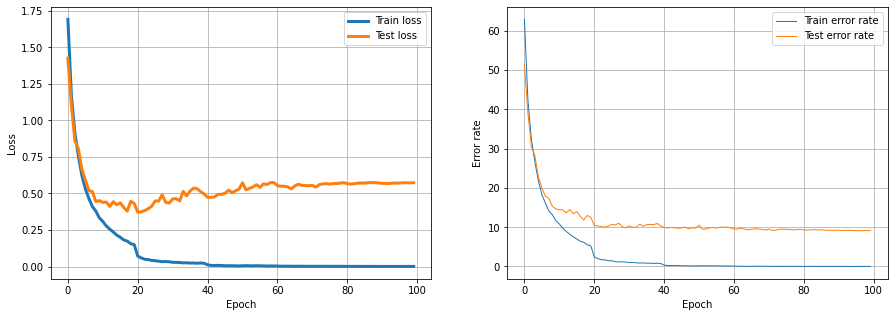

In [10]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.01, avg_pooling: 8, C_1: 80, epoch:100, decay: 1/3 every 20 epochs, log: 6927, batch:100')
# a = tensor(18525., device='cuda:0')
train_loss_hist = [846.064355134964, 586.8728621602058, 457.94604766368866, 378.75015994906425, 312.52932944893837, 266.5092548131943, 233.1986813992262, 205.86122998595238, 189.6919109225273, 166.81784661114216, 154.37786851078272, 138.68941352516413, 127.99533697962761, 118.26390437036753, 107.42429933696985, 100.05319185554981, 91.07612163573503, 87.01449060440063, 78.0495712980628, 74.89012897759676, 35.6056190142408, 29.479045344516635, 24.784551196265966, 23.888066973770037, 20.792333654360846, 19.89644410996698, 18.200870590051636, 16.600742056500167, 17.062380030518398, 16.30416523735039, 14.574568817508407, 14.109270644490607, 13.941441818722524, 12.369263548520394, 12.992175136634614, 11.86582073190948, 12.153303174884059, 11.232686814852059, 12.301341811369639, 10.984567694365978, 5.883956909718108, 3.925480195939599, 3.578324622423679, 3.9935567360080313, 3.465693093254231, 2.73406665915536, 2.8633775385660556, 2.684777038895845, 2.5422549990253174, 2.2755626821526675, 2.5596879609511234, 2.999624813637638, 2.7943684511847096, 2.4292399486439535, 2.8678900163540675, 2.409749084186842, 2.366884930175729, 1.742025103440028, 1.8796535868659703, 1.8855921449376183, 1.654313711622308, 1.0121216616571473, 1.1356724468078028, 1.0724094992460778, 1.0081873466133402, 0.8352646985676984, 1.1546596982161645, 0.9011263304591921, 0.8944807427396881, 0.8682533047576726, 0.7420019133560345, 0.8131559261223629, 0.8694408114406542, 0.7093609836463202, 0.7812654495369316, 0.840405468208246, 0.640516217807999, 0.7978707399736322, 0.7829727900661965, 0.5922295628770371, 0.5533634093571891, 0.45473224002671486, 0.49755088048959806, 0.5056612202015458, 0.36193521485802194, 0.5511961806982981, 0.36345241742742473, 0.455039994268418, 0.5409925368053337, 0.3494335405084712, 0.5003809942299995, 0.3342007162041227, 0.3083471448992441, 0.32692953513492284, 0.30722152937187275, 0.4332814920760484, 0.40182176513985723, 0.3262144619754963, 0.35378726291173734, 0.43019751324072786] 
train_acc_hist =  "[tensor(18525., device='cuda:0'), tensor(28799., device='cuda:0'), tensor(33845., device='cuda:0'), tensor(36707., device='cuda:0'), tensor(39090., device='cuda:0'), tensor(40837., device='cuda:0'), tensor(41929., device='cuda:0'), tensor(42922., device='cuda:0'), tensor(43424., device='cuda:0'), tensor(44158., device='cuda:0'), tensor(44591., device='cuda:0'), tensor(45117., device='cuda:0'), tensor(45551., device='cuda:0'), tensor(45911., device='cuda:0'), tensor(46211., device='cuda:0'), tensor(46497., device='cuda:0'), tensor(46790., device='cuda:0'), tensor(46921., device='cuda:0'), tensor(47252., device='cuda:0'), tensor(47365., device='cuda:0'), tensor(48778., device='cuda:0'), tensor(48992., device='cuda:0'), tensor(49123., device='cuda:0'), tensor(49159., device='cuda:0'), tensor(49265., device='cuda:0'), tensor(49275., device='cuda:0'), tensor(49377., device='cuda:0'), tensor(49425., device='cuda:0'), tensor(49407., device='cuda:0'), tensor(49432., device='cuda:0'), tensor(49498., device='cuda:0'), tensor(49491., device='cuda:0'), tensor(49530., device='cuda:0'), tensor(49566., device='cuda:0'), tensor(49543., device='cuda:0'), tensor(49584., device='cuda:0'), tensor(49574., device='cuda:0'), tensor(49618., device='cuda:0'), tensor(49586., device='cuda:0'), tensor(49622., device='cuda:0'), tensor(49823., device='cuda:0'), tensor(49882., device='cuda:0'), tensor(49874., device='cuda:0'), tensor(49883., device='cuda:0'), tensor(49887., device='cuda:0'), tensor(49914., device='cuda:0'), tensor(49906., device='cuda:0'), tensor(49919., device='cuda:0'), tensor(49922., device='cuda:0'), tensor(49937., device='cuda:0'), tensor(49917., device='cuda:0'), tensor(49910., device='cuda:0'), tensor(49916., device='cuda:0'), tensor(49923., device='cuda:0'), tensor(49921., device='cuda:0'), tensor(49916., device='cuda:0'), tensor(49927., device='cuda:0'), tensor(49938., device='cuda:0'), tensor(49933., device='cuda:0'), tensor(49944., device='cuda:0'), tensor(49948., device='cuda:0'), tensor(49976., device='cuda:0'), tensor(49969., device='cuda:0'), tensor(49965., device='cuda:0'), tensor(49979., device='cuda:0'), tensor(49981., device='cuda:0'), tensor(49964., device='cuda:0'), tensor(49977., device='cuda:0'), tensor(49972., device='cuda:0'), tensor(49972., device='cuda:0'), tensor(49979., device='cuda:0'), tensor(49975., device='cuda:0'), tensor(49977., device='cuda:0'), tensor(49985., device='cuda:0'), tensor(49984., device='cuda:0'), tensor(49974., device='cuda:0'), tensor(49982., device='cuda:0'), tensor(49973., device='cuda:0'), tensor(49977., device='cuda:0'), tensor(49985., device='cuda:0'), tensor(49988., device='cuda:0'), tensor(49994., device='cuda:0'), tensor(49987., device='cuda:0'), tensor(49983., device='cuda:0'), tensor(49994., device='cuda:0'), tensor(49987., device='cuda:0'), tensor(49993., device='cuda:0'), tensor(49988., device='cuda:0'), tensor(49986., device='cuda:0'), tensor(49992., device='cuda:0'), tensor(49988., device='cuda:0'), tensor(49994., device='cuda:0'), tensor(49993., device='cuda:0'), tensor(49995., device='cuda:0'), tensor(49995., device='cuda:0'), tensor(49992., device='cuda:0'), tensor(49989., device='cuda:0'), tensor(49996., device='cuda:0'), tensor(49992., device='cuda:0'), tensor(49991., device='cuda:0')]"
test_loss_hist =  [142.66097402572632, 110.66505897045135, 86.21164923906326, 80.63150840997696, 66.76758539676666, 59.210068076848984, 52.021707981824875, 51.35733214020729, 44.52044767141342, 45.14801487326622, 43.85293920338154, 44.184686332941055, 41.16197991371155, 44.3889592140913, 42.28012391924858, 43.56244316697121, 40.441934898495674, 37.92392247915268, 44.70891530811787, 43.129258558154106, 37.1611053943634, 37.49353389441967, 38.27079674601555, 39.58302363753319, 41.25533239543438, 44.9210893958807, 44.86291354894638, 49.10120080411434, 43.936100631952286, 43.44382871687412, 46.249725341796875, 46.50654627382755, 44.857496842741966, 51.43981398642063, 48.402890868484974, 51.70076459646225, 53.746253065764904, 53.255225874483585, 51.290478870272636, 49.69870154559612, 47.401368997991085, 47.407675087451935, 47.70670342165977, 49.38620639592409, 49.43397108837962, 50.14432384073734, 52.3173316270113, 50.563364658504725, 51.79202502965927, 53.077871069312096, 57.3305421769619, 52.482696924358606, 53.5385943390429, 54.51514922827482, 56.024311512708664, 54.16358542442322, 56.64596524834633, 56.14124068617821, 57.508246101439, 57.48471453040838, 55.376372426748276, 54.964123636484146, 54.890652902424335, 54.50868257880211, 53.136071637272835, 55.269346550107, 56.311018861830235, 55.549885518848896, 55.40182312577963, 55.30477066338062, 55.49954069405794, 54.34059523791075, 56.10121078789234, 56.51151833683252, 56.78524048626423, 56.4062412828207, 56.782378651201725, 56.81059458106756, 57.18915684521198, 57.3625428378582, 56.76420263200998, 56.43015215545893, 56.680709220469, 57.092196233570576, 57.19449895620346, 57.14808285981417, 57.397228084504604, 57.428414449095726, 57.42019676417112, 57.15005023777485, 56.95590587705374, 56.89495678991079, 56.85119557380676, 57.208331644535065, 57.104612454771996, 57.123271599411964, 57.32601258158684, 57.31067272275686, 57.24269389361143, 57.40990278869867]
test_acc_hist =  "[tensor(4862., device='cuda:0'), tensor(6092., device='cuda:0'), tensor(6947., device='cuda:0'), tensor(7179., device='cuda:0'), tensor(7719., device='cuda:0'), tensor(8000., device='cuda:0'), tensor(8211., device='cuda:0'), tensor(8264., device='cuda:0'), tensor(8471., device='cuda:0'), tensor(8534., device='cuda:0'), tensor(8553., device='cuda:0'), tensor(8559., device='cuda:0'), tensor(8634., device='cuda:0'), tensor(8548., device='cuda:0'), tensor(8654., device='cuda:0'), tensor(8602., device='cuda:0'), tensor(8728., device='cuda:0'), tensor(8814., device='cuda:0'), tensor(8701., device='cuda:0'), tensor(8748., device='cuda:0'), tensor(8955., device='cuda:0'), tensor(8968., device='cuda:0'), tensor(8983., device='cuda:0'), tensor(8997., device='cuda:0'), tensor(8978., device='cuda:0'), tensor(8927., device='cuda:0'), tensor(8944., device='cuda:0'), tensor(8898., device='cuda:0'), tensor(8986., device='cuda:0'), tensor(9013., device='cuda:0'), tensor(8967., device='cuda:0'), tensor(9002., device='cuda:0'), tensor(9004., device='cuda:0'), tensor(8922., device='cuda:0'), tensor(8975., device='cuda:0'), tensor(8935., device='cuda:0'), tensor(8928., device='cuda:0'), tensor(8934., device='cuda:0'), tensor(8904., device='cuda:0'), tensor(8969., device='cuda:0'), tensor(9003., device='cuda:0'), tensor(9019., device='cuda:0'), tensor(9006., device='cuda:0'), tensor(9016., device='cuda:0'), tensor(9026., device='cuda:0'), tensor(9018., device='cuda:0'), tensor(8995., device='cuda:0'), tensor(9037., device='cuda:0'), tensor(9017., device='cuda:0'), tensor(9019., device='cuda:0'), tensor(8947., device='cuda:0'), tensor(9055., device='cuda:0'), tensor(9041., device='cuda:0'), tensor(9018., device='cuda:0'), tensor(9006., device='cuda:0'), tensor(9022., device='cuda:0'), tensor(8997., device='cuda:0'), tensor(9005., device='cuda:0'), tensor(8995., device='cuda:0'), tensor(9016., device='cuda:0'), tensor(9045., device='cuda:0'), tensor(9048., device='cuda:0'), tensor(9025., device='cuda:0'), tensor(9048., device='cuda:0'), tensor(9062., device='cuda:0'), tensor(9053., device='cuda:0'), tensor(9037., device='cuda:0'), tensor(9046., device='cuda:0'), tensor(9056., device='cuda:0'), tensor(9071., device='cuda:0'), tensor(9048., device='cuda:0'), tensor(9084., device='cuda:0'), tensor(9076., device='cuda:0'), tensor(9048., device='cuda:0'), tensor(9050., device='cuda:0'), tensor(9055., device='cuda:0'), tensor(9056., device='cuda:0'), tensor(9070., device='cuda:0'), tensor(9056., device='cuda:0'), tensor(9055., device='cuda:0'), tensor(9069., device='cuda:0'), tensor(9074., device='cuda:0'), tensor(9067., device='cuda:0'), tensor(9062., device='cuda:0'), tensor(9071., device='cuda:0'), tensor(9064., device='cuda:0'), tensor(9075., device='cuda:0'), tensor(9079., device='cuda:0'), tensor(9079., device='cuda:0'), tensor(9081., device='cuda:0'), tensor(9074., device='cuda:0'), tensor(9086., device='cuda:0'), tensor(9077., device='cuda:0'), tensor(9080., device='cuda:0'), tensor(9083., device='cuda:0'), tensor(9089., device='cuda:0'), tensor(9089., device='cuda:0'), tensor(9088., device='cuda:0'), tensor(9084., device='cuda:0'), tensor(9088., device='cuda:0')]"
train_loss_hist = [x/500 for x in train_loss_hist]
test_loss_hist = [x/100 for x in test_loss_hist]
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+12]
    train_accuracy_hist.append(int(temp)/50000)
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+11]
    test_accuracy_hist.append(int(temp)/10000)
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)*100) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)*100) + '%')

lr: 0.001, avg_pooling: 8, C_1: 80, epoch:100, decay: 0.9 every 2 epochs, log: 0303, batch: 128
train_loss_hist:  [1.4516856164273704, 0.9908022537560719, 0.7977891742725811, 0.6700806082666987, 0.5593775161696822, 0.49757017221902033, 0.4383585680552456, 0.397723813152984, 0.35204436609049894, 0.3241529493685574, 0.2904964675340811, 0.26938505223035203, 0.2379004984636746, 0.21957112568647355, 0.1973536769714197, 0.18281639761784496, 0.16426163607889124, 0.14624844027487824, 0.12872925159685752, 0.12370491953914428, 0.10599392668708511, 0.09724696601748162, 0.08449275091366695, 0.07768678982191912, 0.07162111897326415, 0.06245082584174012, 0.0520670314621933, 0.0496326811668818, 0.04420610048029276, 0.041277518474480225, 0.03503517107442593, 0.03250551357260331, 0.030396550122048237, 0.028276318516296424, 0.023947849308790833, 0.020749930967040874, 0.020801667806447086, 0.018228742495879455, 0.015359899797000448, 0.016759622712111066, 0.015381127117735231, 0.013026885963414255, 0.0118

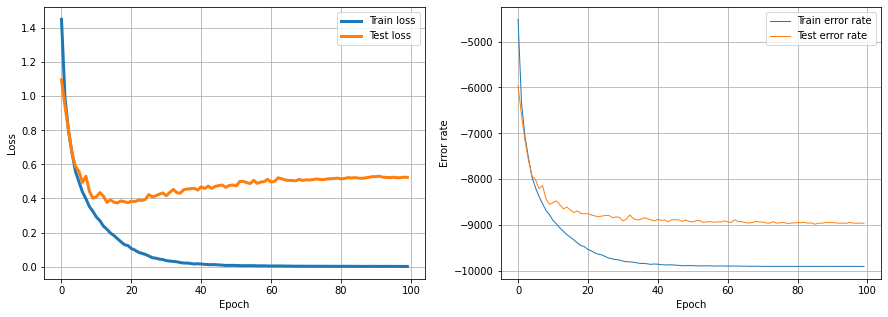

In [11]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.001, avg_pooling: 8, C_1: 80, epoch:100, decay: 0.9 every 2 epochs, log: 0303, batch: 128')
train_loss_hist = [1.4516856164273704, 0.9908022537560719, 0.7977891742725811, 0.6700806082666987, 0.5593775161696822, 0.49757017221902033, 0.4383585680552456, 0.397723813152984, 0.35204436609049894, 0.3241529493685574, 0.2904964675340811, 0.26938505223035203, 0.2379004984636746, 0.21957112568647355, 0.1973536769714197, 0.18281639761784496, 0.16426163607889124, 0.14624844027487824, 0.12872925159685752, 0.12370491953914428, 0.10599392668708511, 0.09724696601748162, 0.08449275091366695, 0.07768678982191912, 0.07162111897326415, 0.06245082584174012, 0.0520670314621933, 0.0496326811668818, 0.04420610048029276, 0.041277518474480225, 0.03503517107442593, 0.03250551357260331, 0.030396550122048237, 0.028276318516296424, 0.023947849308790833, 0.020749930967040874, 0.020801667806447086, 0.018228742495879455, 0.015359899797000448, 0.016759622712111066, 0.015381127117735231, 0.013026885963414255, 0.011868391680540732, 0.011245002242429254, 0.01160214538968828, 0.009833780553369352, 0.00883447991498291, 0.007037332755989273, 0.00699218880171385, 0.007234563856349027, 0.007104967630889905, 0.0059539194648598305, 0.005390997263504659, 0.005569518797414894, 0.005764835912724147, 0.005597088277167843, 0.004705463786927455, 0.004708245895956905, 0.004547148808146781, 0.003959369347052639, 0.0036352457144953275, 0.003810871953127996, 0.00392967899093408, 0.003773523748496814, 0.003294685992690356, 0.003046223788511465, 0.002752106154688558, 0.002294773085448055, 0.0026124639497192154, 0.002377358018006037, 0.002173067085467853, 0.002045182076625495, 0.0021493196990937913, 0.0020654966216668356, 0.0019253243946524212, 0.0019643213061946016, 0.002059887372948172, 0.0017138945464359816, 0.0018858522756735, 0.0016903228261304097, 0.0016085594280595657, 0.001892841686556429, 0.0016396046641854096, 0.0018042942862878815, 0.0013132581521240075, 0.0015150063013897755, 0.0012893353652446043, 0.0014249556913020333, 0.001436442126325109, 0.0014937287133061708, 0.001479467491100035, 0.0011816804620015727, 0.0012867412556458833, 0.0015926508693253178, 0.001335274929109582, 0.0012850881769264396, 0.00138255427787265, 0.0009740800993229576, 0.0012141859305211489, 0.0010406418813361555] 

train_acc_hist = "[tensor(46.1593, device='cuda:0'), tensor(64.4845, device='cuda:0'), tensor(71.7563, device='cuda:0'), tensor(76.3815, device='cuda:0'), tensor(80.5575, device='cuda:0'), tensor(82.8285, device='cuda:0'), tensor(84.7359, device='cuda:0'), tensor(86.2964, device='cuda:0'), tensor(87.8073, device='cuda:0'), tensor(88.7192, device='cuda:0'), tensor(89.9588, device='cuda:0'), tensor(90.7325, device='cuda:0'), tensor(91.6097, device='cuda:0'), tensor(92.3394, device='cuda:0'), tensor(93.0906, device='cuda:0'), tensor(93.6329, device='cuda:0'), tensor(94.2188, device='cuda:0'), tensor(94.8841, device='cuda:0'), tensor(95.4624, device='cuda:0'), tensor(95.6714, device='cuda:0'), tensor(96.2900, device='cuda:0'), tensor(96.6101, device='cuda:0'), tensor(97.0632, device='cuda:0'), tensor(97.3346, device='cuda:0'), tensor(97.4760, device='cuda:0'), tensor(97.8465, device='cuda:0'), tensor(98.1594, device='cuda:0'), tensor(98.3416, device='cuda:0'), tensor(98.5082, device='cuda:0'), tensor(98.5750, device='cuda:0'), tensor(98.8211, device='cuda:0'), tensor(98.9578, device='cuda:0'), tensor(98.9878, device='cuda:0'), tensor(99.0673, device='cuda:0'), tensor(99.2056, device='cuda:0'), tensor(99.3334, device='cuda:0'), tensor(99.3306, device='cuda:0'), tensor(99.4146, device='cuda:0'), tensor(99.5392, device='cuda:0'), tensor(99.4565, device='cuda:0'), tensor(99.5013, device='cuda:0'), tensor(99.6044, device='cuda:0'), tensor(99.6623, device='cuda:0'), tensor(99.6563, device='cuda:0'), tensor(99.6324, device='cuda:0'), tensor(99.7183, device='cuda:0'), tensor(99.7482, device='cuda:0'), tensor(99.8390, device='cuda:0'), tensor(99.8222, device='cuda:0'), tensor(99.7978, device='cuda:0'), tensor(99.8222, device='cuda:0'), tensor(99.8509, device='cuda:0'), tensor(99.8721, device='cuda:0'), tensor(99.8689, device='cuda:0'), tensor(99.8541, device='cuda:0'), tensor(99.8621, device='cuda:0'), tensor(99.9161, device='cuda:0'), tensor(99.8881, device='cuda:0'), tensor(99.8801, device='cuda:0'), tensor(99.9061, device='cuda:0'), tensor(99.9161, device='cuda:0'), tensor(99.9129, device='cuda:0'), tensor(99.9081, device='cuda:0'), tensor(99.8961, device='cuda:0'), tensor(99.9341, device='cuda:0'), tensor(99.9301, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9620, device='cuda:0'), tensor(99.9501, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9720, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9780, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9640, device='cuda:0'), tensor(99.9780, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9720, device='cuda:0'), tensor(99.9640, device='cuda:0'), tensor(99.9880, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9820, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9880, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9920, device='cuda:0'), tensor(99.9780, device='cuda:0'), tensor(99.9920, device='cuda:0')]"
test_loss_hist = [1.0962847614590125, 0.9425583662866037, 0.803215962422045, 0.6645388561713544, 0.5882184082948709, 0.5591635854938363, 0.49429889362824114, 0.5304019922697092, 0.4421366087243527, 0.4011884503349473, 0.41033475534825387, 0.43417047058479696, 0.41401185246208044, 0.37720456662811813, 0.391894761520096, 0.3780105274312104, 0.37378318890740597, 0.3857151994222327, 0.38088420335250567, 0.37533695769460895, 0.384569899662386, 0.3815950466484963, 0.3897087485352649, 0.3886253253757199, 0.3944688684578183, 0.42305767422989954, 0.40879651753208307, 0.4160700170676919, 0.4252683492023734, 0.4325375397559963, 0.4159882524156872, 0.435744184670569, 0.4530147581915312, 0.43457424348290963, 0.43111689633960965, 0.45133536110950423, 0.45586535287431523, 0.4574004028794132, 0.46016110178036024, 0.4493166839208784, 0.46836560926859894, 0.45885902878981605, 0.4724498923066296, 0.45959247629853744, 0.4709498478641993, 0.4755837758885154, 0.4790641354231895, 0.465247917590262, 0.4760720175278338, 0.4793410641671736, 0.4737771360934535, 0.49921849252113815, 0.5004009191371217, 0.49349193784255013, 0.48767471464374396, 0.506703267840645, 0.48885167739059354, 0.4963541013907783, 0.4989131023234959, 0.5126351109599765, 0.49645370037495334, 0.5001085485461392, 0.5211310363079928, 0.5159406827974923, 0.5089217146174817, 0.5058923052458824, 0.5056916874232171, 0.5033735662132879, 0.5121428998588007, 0.5058850544162944, 0.5092089538332782, 0.5087219315427768, 0.5106105890266502, 0.5147744351172749, 0.5115065529376646, 0.5108845935592169, 0.5146056600386584, 0.515912263265139, 0.5174686259861234, 0.5192966000943244, 0.515190186379831, 0.5175183123048348, 0.522369927620586, 0.5204761477210854, 0.5223140361942823, 0.5193298194981828, 0.5181495811365828, 0.5211921047560776, 0.5244067958261394, 0.5282495449992675, 0.5282018130904511, 0.5308123291293277, 0.5250675632040712, 0.5234945749368849, 0.5225539998729017, 0.5248527485358564, 0.5216219342207606, 0.5222630895957162, 0.5249334086157098, 0.5239581229943263]

test_acc_hist =" [tensor(60.5914, device='cuda:0'), tensor(67.0490, device='cuda:0'), tensor(72.5969, device='cuda:0'), tensor(76.8691, device='cuda:0'), tensor(80.3105, device='cuda:0'), tensor(81.0522, device='cuda:0'), tensor(83.0400, device='cuda:0'), tensor(82.3378, device='cuda:0'), tensor(85.2650, device='cuda:0'), tensor(86.5012, device='cuda:0'), tensor(86.0661, device='cuda:0'), tensor(85.7199, device='cuda:0'), tensor(86.5704, device='cuda:0'), tensor(87.4407, device='cuda:0'), tensor(87.0649, device='cuda:0'), tensor(87.7077, device='cuda:0'), tensor(88.2417, device='cuda:0'), tensor(87.8857, device='cuda:0'), tensor(88.4296, device='cuda:0'), tensor(88.5483, device='cuda:0'), tensor(88.4494, device='cuda:0'), tensor(88.8054, device='cuda:0'), tensor(88.9735, device='cuda:0'), tensor(89.1812, device='cuda:0'), tensor(89.0032, device='cuda:0'), tensor(88.9043, device='cuda:0'), tensor(88.8647, device='cuda:0'), tensor(89.3790, device='cuda:0'), tensor(89.2207, device='cuda:0'), tensor(89.2702, device='cuda:0'), tensor(90.0910, device='cuda:0'), tensor(89.6756, device='cuda:0'), tensor(88.7559, device='cuda:0'), tensor(89.5866, device='cuda:0'), tensor(89.8536, device='cuda:0'), tensor(89.7844, device='cuda:0'), tensor(89.3790, device='cuda:0'), tensor(89.5866, device='cuda:0'), tensor(89.8240, device='cuda:0'), tensor(90.1009, device='cuda:0'), tensor(89.7449, device='cuda:0'), tensor(89.9525, device='cuda:0'), tensor(89.8536, device='cuda:0'), tensor(90.2591, device='cuda:0'), tensor(89.8339, device='cuda:0'), tensor(89.8240, device='cuda:0'), tensor(89.8438, device='cuda:0'), tensor(90.1899, device='cuda:0'), tensor(89.8833, device='cuda:0'), tensor(90.1899, device='cuda:0'), tensor(90.3085, device='cuda:0'), tensor(90.0119, device='cuda:0'), tensor(90.0218, device='cuda:0'), tensor(90.3976, device='cuda:0'), tensor(90.2789, device='cuda:0'), tensor(90.2393, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.2690, device='cuda:0'), tensor(90.3283, device='cuda:0'), tensor(90.0514, device='cuda:0'), tensor(90.2591, device='cuda:0'), tensor(90.4272, device='cuda:0'), tensor(89.8240, device='cuda:0'), tensor(90.2195, device='cuda:0'), tensor(90.2393, device='cuda:0'), tensor(90.4173, device='cuda:0'), tensor(90.5360, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.1998, device='cuda:0'), tensor(90.3085, device='cuda:0'), tensor(90.3283, device='cuda:0'), tensor(90.5063, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.2294, device='cuda:0'), tensor(90.5459, device='cuda:0'), tensor(90.5063, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.6349, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.5162, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.4668, device='cuda:0'), tensor(90.4173, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.5063, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.5756, device='cuda:0'), tensor(90.4470, device='cuda:0'), tensor(90.4272, device='cuda:0'), tensor(90.4569, device='cuda:0'), tensor(90.4865, device='cuda:0'), tensor(90.5756, device='cuda:0'), tensor(90.5261, device='cuda:0'), tensor(90.6052, device='cuda:0'), tensor(90.3976, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.5854, device='cuda:0'), tensor(90.5360, device='cuda:0'), tensor(90.6052, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')

lr: 0.01, avg_pooling: 6, C_1: 48, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 7557, batch: 128
train_loss_hist:  [1.4087165549892904, 0.9363131340202469, 0.7368700659031149, 0.6228676059514361, 0.5505694860540082, 0.49143587978904507, 0.4469758586581711, 0.40714520536115406, 0.3833587571330693, 0.3494767210520137, 0.32427417801316744, 0.3046356540201875, 0.28890556451457233, 0.27040609845038877, 0.2548678842613764, 0.24468457182426281, 0.23189146656666876, 0.2170599555153676, 0.2055802522298625, 0.19501548849255837, 0.12965546301601794, 0.11025569556504869, 0.10300167641885903, 0.0978027436539264, 0.09096383906500724, 0.08688430965442182, 0.08201924946797473, 0.07720480796873874, 0.07824555773983526, 0.06987041341440986, 0.0671611262814087, 0.06572006404628535, 0.06260656612113004, 0.06034805396062029, 0.05593344861227076, 0.053519820351429916, 0.05185918511627504, 0.051195248063472684, 0.05054342707909663, 0.046686451940480475, 0.03336196904644713, 0.02785016497349381, 0.0

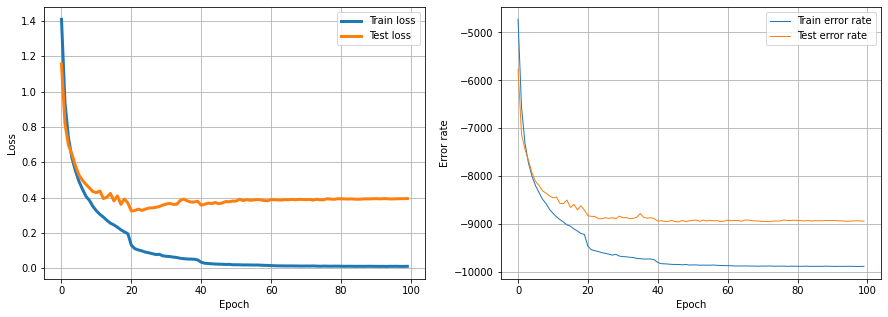

In [12]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.01, avg_pooling: 6, C_1: 48, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 7557, batch: 128')
train_loss_hist = [1.4087165549892904, 0.9363131340202469, 0.7368700659031149, 0.6228676059514361, 0.5505694860540082, 0.49143587978904507, 0.4469758586581711, 0.40714520536115406, 0.3833587571330693, 0.3494767210520137, 0.32427417801316744, 0.3046356540201875, 0.28890556451457233, 0.27040609845038877, 0.2548678842613764, 0.24468457182426281, 0.23189146656666876, 0.2170599555153676, 0.2055802522298625, 0.19501548849255837, 0.12965546301601794, 0.11025569556504869, 0.10300167641885903, 0.0978027436539264, 0.09096383906500724, 0.08688430965442182, 0.08201924946797473, 0.07720480796873874, 0.07824555773983526, 0.06987041341440986, 0.0671611262814087, 0.06572006404628535, 0.06260656612113004, 0.06034805396062029, 0.05593344861227076, 0.053519820351429916, 0.05185918511627504, 0.051195248063472684, 0.05054342707909663, 0.046686451940480475, 0.03336196904644713, 0.02785016497349381, 0.02633460966365226, 0.024686154313957143, 0.023443622739694994, 0.022383821195663164, 0.022124658581679283, 0.021118239577040267, 0.021376808674153314, 0.01933716209438603, 0.019423804305436665, 0.019046763616168628, 0.018268027825785987, 0.018370104287905843, 0.018158470305478406, 0.017686226772015815, 0.0178174366989909, 0.016995587281685064, 0.015974936609054007, 0.015605432283885948, 0.01454049959133291, 0.013708323066996988, 0.01307224558161386, 0.013007570192089203, 0.012507061189983773, 0.012586129667913861, 0.012619929301821629, 0.012349788280253958, 0.012053164790439256, 0.01184953649378265, 0.012219590178983825, 0.011930812663836953, 0.012481376953611194, 0.0116271534011654, 0.010940441829593056, 0.011542857267900997, 0.011373305596206385, 0.010976204454489148, 0.011334775911008134, 0.011244248904888053, 0.010888466790742467, 0.010377790440347931, 0.010728461910849032, 0.01061591913904566, 0.010330562819214658, 0.010382160475618109, 0.01029514353198316, 0.010295010981080896, 0.010703946407491347, 0.010420065341026657, 0.010282609272924492, 0.009992880869985503, 0.010212786465316363, 0.00967761522094669, 0.010462236676134093, 0.010229659193526487, 0.010419649613873504, 0.009923243551881854, 0.010002379391706832, 0.01038049909618476] 
train_acc_hist = "[tensor(48.2685, device='cuda:0'), tensor(66.6264, device='cuda:0'), tensor(74.2080, device='cuda:0'), tensor(78.3140, device='cuda:0'), tensor(81.0606, device='cuda:0'), tensor(82.9803, device='cuda:0'), tensor(84.4198, device='cuda:0'), tensor(85.8152, device='cuda:0'), tensor(86.7339, device='cuda:0'), tensor(87.9252, device='cuda:0'), tensor(88.7676, device='cuda:0'), tensor(89.4929, device='cuda:0'), tensor(90.0887, device='cuda:0'), tensor(90.5866, device='cuda:0'), tensor(91.1721, device='cuda:0'), tensor(91.4570, device='cuda:0'), tensor(92.0137, device='cuda:0'), tensor(92.4620, device='cuda:0'), tensor(92.9779, device='cuda:0'), tensor(93.1845, device='cuda:0'), tensor(95.6558, device='cuda:0'), tensor(96.3743, device='cuda:0'), tensor(96.5737, device='cuda:0'), tensor(96.7535, device='cuda:0'), tensor(96.9761, device='cuda:0'), tensor(97.1280, device='cuda:0'), tensor(97.2958, device='cuda:0'), tensor(97.4972, device='cuda:0'), tensor(97.3230, device='cuda:0'), tensor(97.6930, device='cuda:0'), tensor(97.8057, device='cuda:0'), tensor(97.8405, device='cuda:0'), tensor(97.9508, device='cuda:0'), tensor(97.9959, device='cuda:0'), tensor(98.1925, device='cuda:0'), tensor(98.2361, device='cuda:0'), tensor(98.3152, device='cuda:0'), tensor(98.3016, device='cuda:0'), tensor(98.3060, device='cuda:0'), tensor(98.4671, device='cuda:0'), tensor(99.0417, device='cuda:0'), tensor(99.2855, device='cuda:0'), tensor(99.3167, device='cuda:0'), tensor(99.3606, device='cuda:0'), tensor(99.4266, device='cuda:0'), tensor(99.4473, device='cuda:0'), tensor(99.4485, device='cuda:0'), tensor(99.5205, device='cuda:0'), tensor(99.4513, device='cuda:0'), tensor(99.5640, device='cuda:0'), tensor(99.5452, device='cuda:0'), tensor(99.5404, device='cuda:0'), tensor(99.6044, device='cuda:0'), tensor(99.5844, device='cuda:0'), tensor(99.5944, device='cuda:0'), tensor(99.5984, device='cuda:0'), tensor(99.5684, device='cuda:0'), tensor(99.6244, device='cuda:0'), tensor(99.6683, device='cuda:0'), tensor(99.6703, device='cuda:0'), tensor(99.6951, device='cuda:0'), tensor(99.7143, device='cuda:0'), tensor(99.7630, device='cuda:0'), tensor(99.7582, device='cuda:0'), tensor(99.7682, device='cuda:0'), tensor(99.7570, device='cuda:0'), tensor(99.7702, device='cuda:0'), tensor(99.7822, device='cuda:0'), tensor(99.7922, device='cuda:0'), tensor(99.8082, device='cuda:0'), tensor(99.7762, device='cuda:0'), tensor(99.7842, device='cuda:0'), tensor(99.7602, device='cuda:0'), tensor(99.8062, device='cuda:0'), tensor(99.8062, device='cuda:0'), tensor(99.8022, device='cuda:0'), tensor(99.7902, device='cuda:0'), tensor(99.8362, device='cuda:0'), tensor(99.7962, device='cuda:0'), tensor(99.8182, device='cuda:0'), tensor(99.8170, device='cuda:0'), tensor(99.8382, device='cuda:0'), tensor(99.8010, device='cuda:0'), tensor(99.8170, device='cuda:0'), tensor(99.8429, device='cuda:0'), tensor(99.8302, device='cuda:0'), tensor(99.8322, device='cuda:0'), tensor(99.8401, device='cuda:0'), tensor(99.8030, device='cuda:0'), tensor(99.8202, device='cuda:0'), tensor(99.8461, device='cuda:0'), tensor(99.8581, device='cuda:0'), tensor(99.8350, device='cuda:0'), tensor(99.8421, device='cuda:0'), tensor(99.8302, device='cuda:0'), tensor(99.8302, device='cuda:0'), tensor(99.8421, device='cuda:0'), tensor(99.8601, device='cuda:0'), tensor(99.8581, device='cuda:0'), tensor(99.8362, device='cuda:0')]"
test_loss_hist = [1.1562667066537882, 0.8159764220442953, 0.6958993409253373, 0.6448880317090433, 0.5798925474474702, 0.5274264665344094, 0.49763314595705344, 0.47428366881382616, 0.45393367658687545, 0.4333048815591426, 0.42766102054451083, 0.4370145254497287, 0.39385528334333925, 0.40192160802551463, 0.42307458365265327, 0.38125803859173496, 0.40889598976207686, 0.36088557711130453, 0.39137352512607093, 0.36870273721369007, 0.323555530249318, 0.3264485471233537, 0.33418163477997237, 0.3269127847839005, 0.3342062285806559, 0.3404132878478569, 0.3412265991674194, 0.3441375295949888, 0.349211700166328, 0.3568870047036606, 0.3630621742598618, 0.36678027248458017, 0.3608667970269541, 0.3616959437539306, 0.3837721841999247, 0.3912099952561946, 0.38093773850911783, 0.3744190671021425, 0.3747693220082718, 0.37835743815838535, 0.35653528165590914, 0.3621548947088326, 0.36775683272111265, 0.36597857199892214, 0.37154799209365363, 0.36474114741328395, 0.3691175984619539, 0.37717939314397075, 0.37600435806980614, 0.3797846486485457, 0.3799176000624518, 0.3905358368271514, 0.38229699998716765, 0.38774781127142, 0.38411202687251417, 0.38592464391943776, 0.38820184059912644, 0.3870319318545016, 0.38236835084949866, 0.38156306573861765, 0.3879277436887916, 0.38752580603844, 0.3860360069931308, 0.3852824010426485, 0.38832005410443377, 0.38707234191743634, 0.3893593375724328, 0.3872537208320219, 0.3894687592040134, 0.3888138899508911, 0.38781875334208527, 0.3888910799464093, 0.38500710972879504, 0.39010523410537573, 0.38682071058244644, 0.38698633241502545, 0.3929428250729283, 0.39132764944924586, 0.3896211131558388, 0.39272699929490873, 0.3925681508417371, 0.39219786434233944, 0.39110222265501565, 0.39205860841689233, 0.39057122015311746, 0.38994160935848576, 0.3912621593645102, 0.39251544703788394, 0.39209089041510714, 0.3926747934067551, 0.39373416802551175, 0.39236788083858126, 0.3934195348167721, 0.3936247807703441, 0.39181618845161004, 0.3919692809068704, 0.39289791816020314, 0.39322881145945077, 0.39320069636347926, 0.3941162174826936]
test_acc_hist = "[tensor(58.6234, device='cuda:0'), tensor(72.2607, device='cuda:0'), tensor(75.3956, device='cuda:0'), tensor(77.7690, device='cuda:0'), tensor(80.3402, device='cuda:0'), tensor(82.1203, device='cuda:0'), tensor(82.9510, device='cuda:0'), tensor(84.0783, device='cuda:0'), tensor(84.5530, device='cuda:0'), tensor(85.1365, device='cuda:0'), tensor(85.5320, device='cuda:0'), tensor(85.3738, device='cuda:0'), tensor(86.7188, device='cuda:0'), tensor(86.7385, device='cuda:0'), tensor(85.9869, device='cuda:0'), tensor(87.5396, device='cuda:0'), tensor(86.8968, device='cuda:0'), tensor(88.0538, device='cuda:0'), tensor(87.1835, device='cuda:0'), tensor(88.1131, device='cuda:0'), tensor(89.2603, device='cuda:0'), tensor(89.4086, device='cuda:0'), tensor(89.4086, device='cuda:0'), tensor(89.8932, device='cuda:0'), tensor(89.9031, device='cuda:0'), tensor(89.6954, device='cuda:0'), tensor(89.8240, device='cuda:0'), tensor(89.6756, device='cuda:0'), tensor(89.9328, device='cuda:0'), tensor(89.3493, device='cuda:0'), tensor(89.6855, device='cuda:0'), tensor(89.6657, device='cuda:0'), tensor(89.8833, device='cuda:0'), tensor(89.8141, device='cuda:0'), tensor(89.5767, device='cuda:0'), tensor(88.7955, device='cuda:0'), tensor(89.6559, device='cuda:0'), tensor(89.7844, device='cuda:0'), tensor(89.6855, device='cuda:0'), tensor(89.8932, device='cuda:0'), tensor(90.3976, device='cuda:0'), tensor(90.3085, device='cuda:0'), tensor(90.4569, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.2690, device='cuda:0'), tensor(90.4865, device='cuda:0'), tensor(90.5657, device='cuda:0'), tensor(90.2591, device='cuda:0'), tensor(90.4964, device='cuda:0'), tensor(90.3283, device='cuda:0'), tensor(90.2492, device='cuda:0'), tensor(90.1503, device='cuda:0'), tensor(90.4470, device='cuda:0'), tensor(90.1701, device='cuda:0'), tensor(90.3580, device='cuda:0'), tensor(90.2294, device='cuda:0'), tensor(90.3382, device='cuda:0'), tensor(90.2987, device='cuda:0'), tensor(90.4767, device='cuda:0'), tensor(90.3976, device='cuda:0'), tensor(90.1899, device='cuda:0'), tensor(90.3283, device='cuda:0'), tensor(90.2492, device='cuda:0'), tensor(90.2987, device='cuda:0'), tensor(90.3877, device='cuda:0'), tensor(90.1701, device='cuda:0'), tensor(90.1800, device='cuda:0'), tensor(90.3085, device='cuda:0'), tensor(90.3580, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.4668, device='cuda:0'), tensor(90.4668, device='cuda:0'), tensor(90.5261, device='cuda:0'), tensor(90.3679, device='cuda:0'), tensor(90.3877, device='cuda:0'), tensor(90.3679, device='cuda:0'), tensor(90.1701, device='cuda:0'), tensor(90.2591, device='cuda:0'), tensor(90.2888, device='cuda:0'), tensor(90.1899, device='cuda:0'), tensor(90.2690, device='cuda:0'), tensor(90.2987, device='cuda:0'), tensor(90.3481, device='cuda:0'), tensor(90.2789, device='cuda:0'), tensor(90.3580, device='cuda:0'), tensor(90.3085, device='cuda:0'), tensor(90.3184, device='cuda:0'), tensor(90.3184, device='cuda:0'), tensor(90.2789, device='cuda:0'), tensor(90.2690, device='cuda:0'), tensor(90.2888, device='cuda:0'), tensor(90.2789, device='cuda:0'), tensor(90.3382, device='cuda:0'), tensor(90.3481, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.2987, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.3976, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')

lr: 0.1,avg_pooling: 6, C_1: 48, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 8180, batch: 128
train_loss_hist:  [1.5588520054926958, 1.0040416151971159, 0.7636783094052464, 0.6299395714422016, 0.5407933108032207, 0.48268969322714356, 0.43871369134739535, 0.39985676140279114, 0.37005306010508476, 0.34420762319698966, 0.32597907078083216, 0.30159614721070166, 0.2844887821342024, 0.27124432575367297, 0.2584733432135009, 0.25093348714930325, 0.23574434731470045, 0.22665299823903062, 0.21867401657811822, 0.2174455542546099, 0.12500405242033016, 0.09985764343720263, 0.08651480952854199, 0.08223354347679011, 0.0771197165264879, 0.07174912363748111, 0.06847942558110065, 0.0659907573210004, 0.06276031573781805, 0.062121057063531694, 0.06288334830899907, 0.05735196086966321, 0.0570835829771998, 0.05427293370232519, 0.05836536856534917, 0.0531156698570532, 0.05568155485307774, 0.05703772317446635, 0.05288247799600863, 0.05383313482370027, 0.027866235319667917, 0.019966860102904042, 0.0

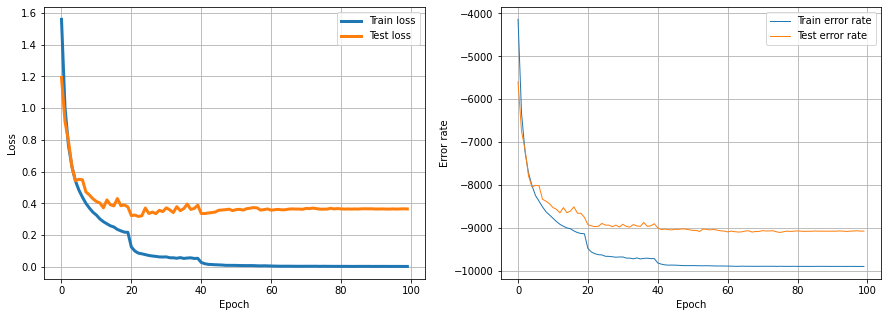

In [13]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.1,avg_pooling: 6, C_1: 48, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 8180, batch: 128')
train_loss_hist = [1.5588520054926958, 1.0040416151971159, 0.7636783094052464, 0.6299395714422016, 0.5407933108032207, 0.48268969322714356, 0.43871369134739535, 0.39985676140279114, 0.37005306010508476, 0.34420762319698966, 0.32597907078083216, 0.30159614721070166, 0.2844887821342024, 0.27124432575367297, 0.2584733432135009, 0.25093348714930325, 0.23574434731470045, 0.22665299823903062, 0.21867401657811822, 0.2174455542546099, 0.12500405242033016, 0.09985764343720263, 0.08651480952854199, 0.08223354347679011, 0.0771197165264879, 0.07174912363748111, 0.06847942558110065, 0.0659907573210004, 0.06276031573781805, 0.062121057063531694, 0.06288334830899907, 0.05735196086966321, 0.0570835829771998, 0.05427293370232519, 0.05836536856534917, 0.0531156698570532, 0.05568155485307774, 0.05703772317446635, 0.05288247799600863, 0.05383313482370027, 0.027866235319667917, 0.019966860102904042, 0.015857652770271978, 0.014645318441150133, 0.013378379608640242, 0.012546482002910446, 0.011526583021779394, 0.009658590146719152, 0.009626660962253238, 0.009399953745770009, 0.009234106257174383, 0.008525855442219654, 0.008318359136034775, 0.007961369811972875, 0.00816393961601169, 0.00792884287934112, 0.0068663355045537455, 0.006264373770101553, 0.006939991362630497, 0.006248194291857798, 0.005465429541660839, 0.004850816415281027, 0.0044188043576024495, 0.0039901224161793605, 0.00427584406976943, 0.004101392795385964, 0.0039826109419580395, 0.003731372579664249, 0.0036655106957492124, 0.003699246048450927, 0.0038835452646231445, 0.003847535928044959, 0.003822605802065424, 0.003886943254732977, 0.0032977342773514713, 0.0037456037348036265, 0.0034763036808475394, 0.0033514925966198887, 0.003250088339866213, 0.003270779727221838, 0.0030556389983222984, 0.0031982102451305313, 0.003047532993955347, 0.002870931279594841, 0.0028496111675119147, 0.0031640818911244915, 0.0031310031849258553, 0.003084981136078782, 0.0032434197346074864, 0.0028485273339433114, 0.0029604342271713183, 0.0029348202858163674, 0.0030911935484715645, 0.002930455942875813, 0.0027966552317309815, 0.0028061042276277775, 0.0028547997865706796, 0.002779520537672669, 0.002741303801794996, 0.002643581013903236] 
train_acc_hist = "[tensor(42.3857, device='cuda:0'), tensor(64.2547, device='cuda:0'), tensor(73.2357, device='cuda:0'), tensor(78.2093, device='cuda:0'), tensor(81.1733, device='cuda:0'), tensor(83.4523, device='cuda:0'), tensor(84.7626, device='cuda:0'), tensor(86.0882, device='cuda:0'), tensor(87.2386, device='cuda:0'), tensor(87.9747, device='cuda:0'), tensor(88.7480, device='cuda:0'), tensor(89.5269, device='cuda:0'), tensor(90.1630, device='cuda:0'), tensor(90.6222, device='cuda:0'), tensor(91.0030, device='cuda:0'), tensor(91.1901, device='cuda:0'), tensor(91.7048, device='cuda:0'), tensor(92.0884, device='cuda:0'), tensor(92.3010, device='cuda:0'), tensor(92.3553, device='cuda:0'), tensor(95.7932, device='cuda:0'), tensor(96.6136, device='cuda:0'), tensor(97.0145, device='cuda:0'), tensor(97.2426, device='cuda:0'), tensor(97.2930, device='cuda:0'), tensor(97.6067, device='cuda:0'), tensor(97.6379, device='cuda:0'), tensor(97.7250, device='cuda:0'), tensor(97.8325, device='cuda:0'), tensor(97.7749, device='cuda:0'), tensor(97.7757, device='cuda:0'), tensor(98.0395, device='cuda:0'), tensor(98.0395, device='cuda:0'), tensor(98.2081, device='cuda:0'), tensor(97.9907, device='cuda:0'), tensor(98.2353, device='cuda:0'), tensor(98.1074, device='cuda:0'), tensor(98.0547, device='cuda:0'), tensor(98.1566, device='cuda:0'), tensor(98.1478, device='cuda:0'), tensor(99.1716, device='cuda:0'), tensor(99.4385, device='cuda:0'), tensor(99.6112, device='cuda:0'), tensor(99.6803, device='cuda:0'), tensor(99.6619, device='cuda:0'), tensor(99.6803, device='cuda:0'), tensor(99.7223, device='cuda:0'), tensor(99.7790, device='cuda:0'), tensor(99.7870, device='cuda:0'), tensor(99.7922, device='cuda:0'), tensor(99.7802, device='cuda:0'), tensor(99.8022, device='cuda:0'), tensor(99.8190, device='cuda:0'), tensor(99.8262, device='cuda:0'), tensor(99.8150, device='cuda:0'), tensor(99.8282, device='cuda:0'), tensor(99.8561, device='cuda:0'), tensor(99.8841, device='cuda:0'), tensor(99.8681, device='cuda:0'), tensor(99.8781, device='cuda:0'), tensor(99.8981, device='cuda:0'), tensor(99.9201, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9540, device='cuda:0'), tensor(99.9181, device='cuda:0'), tensor(99.9381, device='cuda:0'), tensor(99.9441, device='cuda:0'), tensor(99.9481, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9540, device='cuda:0'), tensor(99.9401, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9401, device='cuda:0'), tensor(99.9720, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9560, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9640, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9720, device='cuda:0'), tensor(99.9600, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9620, device='cuda:0'), tensor(99.9560, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9580, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9680, device='cuda:0'), tensor(99.9720, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9800, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9800, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9820, device='cuda:0'), tensor(99.9740, device='cuda:0')]"
test_loss_hist = [1.192952175683613, 0.9155555050584334, 0.7920297972763641, 0.6291699605652049, 0.5426547919647603, 0.551815267227873, 0.5481230593934844, 0.47177911087681973, 0.45246602425092386, 0.4286709733401673, 0.4115161865572386, 0.4022818675524072, 0.37207495449464534, 0.4216982094170172, 0.3912671189519423, 0.3840010432125647, 0.43039242338530626, 0.3850040926208979, 0.3900718215522887, 0.3772947444945951, 0.3225699433986145, 0.3262053117910518, 0.31749689390387714, 0.3217719982885107, 0.37077477225397204, 0.33625012843669216, 0.34498767988591256, 0.335142757413508, 0.35628974598042573, 0.34801748998557464, 0.3716428205370903, 0.3587707825287988, 0.3419870425817333, 0.3791404352346553, 0.35389081916854354, 0.36657397335843195, 0.3956278888862344, 0.3619912361042409, 0.36802610528619983, 0.38866972734656513, 0.3360569223384314, 0.33590222385865226, 0.3392338960231105, 0.34198496990566013, 0.3450736693943603, 0.35640244978138164, 0.3582424521446228, 0.3603786751627922, 0.36332299390548395, 0.3541156773137141, 0.3607740052327325, 0.3622405463004414, 0.3575027033309393, 0.36631966325678406, 0.3695047626012488, 0.3733800438385976, 0.3712855432229706, 0.3576151496624645, 0.36070093842624107, 0.3647612932173512, 0.35693470294339746, 0.3599197091181067, 0.361921520738662, 0.35945080531926094, 0.35972904583698584, 0.36354627149014535, 0.3651701926807814, 0.3640191044799889, 0.3639736071794848, 0.3626164961842042, 0.36816796311472033, 0.36681784066972856, 0.3702277655277071, 0.36664159973210925, 0.3633304495788828, 0.36357836161233203, 0.3637046893186207, 0.3686395597797406, 0.365067218017729, 0.3670883742691595, 0.36527588727730737, 0.3639095861323272, 0.36470038075990313, 0.36399716949915584, 0.3647289093159422, 0.36390177632057213, 0.3658271768613707, 0.3657365812908245, 0.3656171581979039, 0.36559645199700247, 0.36424649440789525, 0.36460477094861526, 0.3649264015728914, 0.36394528761694706, 0.3641122593721257, 0.36489408029408393, 0.36394370054896874, 0.3648714254362674, 0.36559165382309805, 0.3648572773495807]
test_acc_hist = "[tensor(56.9620, device='cuda:0'), tensor(68.5127, device='cuda:0'), tensor(72.6562, device='cuda:0'), tensor(78.8766, device='cuda:0'), tensor(81.4676, device='cuda:0'), tensor(81.0720, device='cuda:0'), tensor(81.1610, device='cuda:0'), tensor(84.3157, device='cuda:0'), tensor(84.7706, device='cuda:0'), tensor(85.3639, device='cuda:0'), tensor(86.2638, device='cuda:0'), tensor(86.6594, device='cuda:0'), tensor(87.4901, device='cuda:0'), tensor(86.2638, device='cuda:0'), tensor(87.4604, device='cuda:0'), tensor(87.0649, device='cuda:0'), tensor(86.0858, device='cuda:0'), tensor(87.5791, device='cuda:0'), tensor(87.5890, device='cuda:0'), tensor(88.5285, device='cuda:0'), tensor(90.2393, device='cuda:0'), tensor(90.5261, device='cuda:0'), tensor(90.6942, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(89.9525, device='cuda:0'), tensor(90.3481, device='cuda:0'), tensor(90.3580, device='cuda:0'), tensor(90.7140, device='cuda:0'), tensor(90.3580, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.1503, device='cuda:0'), tensor(90.6547, device='cuda:0'), tensor(90.8030, device='cuda:0'), tensor(90.2097, device='cuda:0'), tensor(90.5459, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(89.7350, device='cuda:0'), tensor(90.6349, device='cuda:0'), tensor(90.5063, device='cuda:0'), tensor(90.0316, device='cuda:0'), tensor(90.9711, device='cuda:0'), tensor(91.4062, device='cuda:0'), tensor(91.2777, device='cuda:0'), tensor(91.4062, device='cuda:0'), tensor(91.4557, device='cuda:0'), tensor(91.3172, device='cuda:0'), tensor(91.3370, device='cuda:0'), tensor(91.2282, device='cuda:0'), tensor(91.2876, device='cuda:0'), tensor(91.4359, device='cuda:0'), tensor(91.5744, device='cuda:0'), tensor(91.5941, device='cuda:0'), tensor(91.8216, device='cuda:0'), tensor(91.2480, device='cuda:0'), tensor(91.3469, device='cuda:0'), tensor(91.4656, device='cuda:0'), tensor(91.3370, device='cuda:0'), tensor(91.5249, device='cuda:0'), tensor(91.6832, device='cuda:0'), tensor(91.7425, device='cuda:0'), tensor(91.9304, device='cuda:0'), tensor(91.7425, device='cuda:0'), tensor(91.8809, device='cuda:0'), tensor(91.9601, device='cuda:0'), tensor(91.9304, device='cuda:0'), tensor(91.7326, device='cuda:0'), tensor(91.6733, device='cuda:0'), tensor(91.9699, device='cuda:0'), tensor(91.8315, device='cuda:0'), tensor(91.8216, device='cuda:0'), tensor(91.6436, device='cuda:0'), tensor(91.7128, device='cuda:0'), tensor(91.6930, device='cuda:0'), tensor(91.6733, device='cuda:0'), tensor(91.9106, device='cuda:0'), tensor(92.0589, device='cuda:0'), tensor(91.8908, device='cuda:0'), tensor(91.7425, device='cuda:0'), tensor(91.8216, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7029, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.8117, device='cuda:0'), tensor(91.7820, device='cuda:0'), tensor(91.7820, device='cuda:0'), tensor(91.7128, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7524, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7524, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7029, device='cuda:0'), tensor(91.7524, device='cuda:0'), tensor(91.8216, device='cuda:0'), tensor(91.7623, device='cuda:0'), tensor(91.7326, device='cuda:0'), tensor(91.6634, device='cuda:0'), tensor(91.7425, device='cuda:0'), tensor(91.7425, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')

lr: 0.1,avg_pooling: 8, C_1: 80, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 8289, batch: 128
train_loss_hist:  [1.7694034119091375, 1.2630332296766589, 1.0103346656655412, 0.8555855583351897, 0.7356753489550423, 0.642883884632374, 0.5592842133301298, 0.49765827466764717, 0.44987459701802723, 0.405609821152809, 0.37394912407526276, 0.34556227571824016, 0.31718830265047604, 0.29921807642178155, 0.2816963660747499, 0.2652704685431002, 0.24796836293490646, 0.23670387612965405, 0.22279757754805754, 0.21178981791371884, 0.12003776424414361, 0.08555462484812493, 0.07826084461625275, 0.06812199595791604, 0.06316836670403132, 0.05584174179760239, 0.05304050616100621, 0.0534767564016935, 0.047727164879079215, 0.045312999766748734, 0.042494727058045544, 0.042749478304258466, 0.04612983203948001, 0.043171687129065585, 0.04460532744974851, 0.04427248574650425, 0.04303446520224709, 0.04156755035400124, 0.03849609730565144, 0.04245753458860661, 0.020388363757530403, 0.010537858712701294, 

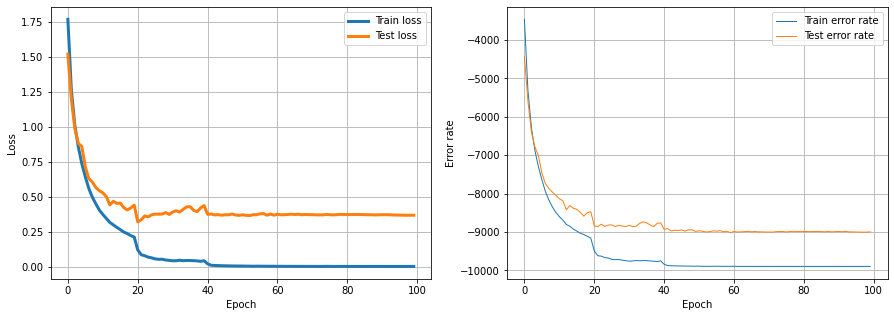

In [14]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.1,avg_pooling: 8, C_1: 80, epoch:100, decay: 1/3 every 20 epochs and 0.0001, log: 8289, batch: 128')
train_loss_hist = [1.7694034119091375, 1.2630332296766589, 1.0103346656655412, 0.8555855583351897, 0.7356753489550423, 0.642883884632374, 0.5592842133301298, 0.49765827466764717, 0.44987459701802723, 0.405609821152809, 0.37394912407526276, 0.34556227571824016, 0.31718830265047604, 0.29921807642178155, 0.2816963660747499, 0.2652704685431002, 0.24796836293490646, 0.23670387612965405, 0.22279757754805754, 0.21178981791371884, 0.12003776424414361, 0.08555462484812493, 0.07826084461625275, 0.06812199595791604, 0.06316836670403132, 0.05584174179760239, 0.05304050616100621, 0.0534767564016935, 0.047727164879079215, 0.045312999766748734, 0.042494727058045544, 0.042749478304258466, 0.04612983203948001, 0.043171687129065585, 0.04460532744974851, 0.04427248574650425, 0.04303446520224709, 0.04156755035400124, 0.03849609730565144, 0.04245753458860661, 0.020388363757530403, 0.010537858712701294, 0.008784671868745457, 0.008015198074966012, 0.007146882329462453, 0.006445880740663022, 0.005844033586577086, 0.005451580149876644, 0.0050977976164123156, 0.004838245177386648, 0.004712863709441746, 0.0041083453525759305, 0.003987492907576768, 0.0034240108190129377, 0.00379462051443527, 0.003811928057147528, 0.003413421105143264, 0.003196164284853022, 0.0031250642982961806, 0.0030908543122140334, 0.0029337248434294777, 0.002655892362704982, 0.0025534186606167974, 0.002390121209525677, 0.0025686622839784273, 0.0022806010782615046, 0.0023334363905374734, 0.002264844852930192, 0.0022062497289257023, 0.0022732772511731393, 0.0021884091098851206, 0.00211590293201182, 0.002094774844397045, 0.0020920938557333043, 0.00245851045935903, 0.002219490550459622, 0.0020598409689374536, 0.0019788047907066523, 0.0020995604477541717, 0.0019762140617299766, 0.0019248833091122092, 0.0019375086612993485, 0.0018980851595062534, 0.0020128578525078255, 0.0018858865206844418, 0.0018401095924108191, 0.001939586051927327, 0.001951734397618119, 0.0019185259218311027, 0.0019397034009536276, 0.001993053209776764, 0.0019072975009552363, 0.0018387342395428854, 0.001911450745067452, 0.0018975672971122586, 0.0018283217214792253, 0.0018435698914397603, 0.0018866782170741836, 0.001875735775349052, 0.0019758925313199094] 
train_acc_hist = "[tensor(35.6398, device='cuda:0'), tensor(54.0729, device='cuda:0'), tensor(63.7940, device='cuda:0'), tensor(69.7858, device='cuda:0'), tensor(74.0229, device='cuda:0'), tensor(77.3829, device='cuda:0'), tensor(80.4696, device='cuda:0'), tensor(82.7022, device='cuda:0'), tensor(84.4761, device='cuda:0'), tensor(85.9419, device='cuda:0'), tensor(87.0289, device='cuda:0'), tensor(87.9256, device='cuda:0'), tensor(89.0525, device='cuda:0'), tensor(89.5276, device='cuda:0'), tensor(90.2458, device='cuda:0'), tensor(90.7960, device='cuda:0'), tensor(91.3391, device='cuda:0'), tensor(91.6872, device='cuda:0'), tensor(92.1339, device='cuda:0'), tensor(92.6087, device='cuda:0'), tensor(95.9695, device='cuda:0'), tensor(97.2047, device='cuda:0'), tensor(97.3114, device='cuda:0'), tensor(97.6894, device='cuda:0'), tensor(97.8089, device='cuda:0'), tensor(98.1582, device='cuda:0'), tensor(98.2281, device='cuda:0'), tensor(98.1933, device='cuda:0'), tensor(98.3772, device='cuda:0'), tensor(98.4958, device='cuda:0'), tensor(98.6201, device='cuda:0'), tensor(98.5630, device='cuda:0'), tensor(98.4483, device='cuda:0'), tensor(98.5210, device='cuda:0'), tensor(98.4695, device='cuda:0'), tensor(98.4671, device='cuda:0'), tensor(98.5734, device='cuda:0'), tensor(98.6361, device='cuda:0'), tensor(98.7072, device='cuda:0'), tensor(98.5466, device='cuda:0'), tensor(99.4385, device='cuda:0'), tensor(99.7622, device='cuda:0'), tensor(99.8182, device='cuda:0'), tensor(99.8481, device='cuda:0'), tensor(99.8681, device='cuda:0'), tensor(99.8861, device='cuda:0'), tensor(99.9001, device='cuda:0'), tensor(99.9121, device='cuda:0'), tensor(99.9221, device='cuda:0'), tensor(99.9321, device='cuda:0'), tensor(99.9201, device='cuda:0'), tensor(99.9560, device='cuda:0'), tensor(99.9660, device='cuda:0'), tensor(99.9700, device='cuda:0'), tensor(99.9481, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9528, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9640, device='cuda:0'), tensor(99.9700, device='cuda:0'), tensor(99.9580, device='cuda:0'), tensor(99.9780, device='cuda:0'), tensor(99.9820, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9740, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9820, device='cuda:0'), tensor(99.9960, device='cuda:0'), tensor(99.9828, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9860, device='cuda:0'), tensor(99.9920, device='cuda:0'), tensor(99.9860, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9760, device='cuda:0'), tensor(99.9780, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9860, device='cuda:0'), tensor(99.9880, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9820, device='cuda:0'), tensor(99.9880, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9860, device='cuda:0'), tensor(99.9816, device='cuda:0'), tensor(99.9940, device='cuda:0'), tensor(99.9960, device='cuda:0'), tensor(99.9900, device='cuda:0'), tensor(99.9920, device='cuda:0'), tensor(99.9860, device='cuda:0'), tensor(99.9920, device='cuda:0'), tensor(99.9880, device='cuda:0'), tensor(99.9840, device='cuda:0'), tensor(99.9900, device='cuda:0')]"
test_loss_hist = [1.5215485910826092, 1.1981878748422936, 0.9872799787340285, 0.8820801415020907, 0.8594069420536862, 0.7127551323250879, 0.6300911039491243, 0.6062035394620292, 0.5670694535291647, 0.5437883444224731, 0.5283927868438673, 0.5021971524516239, 0.44179110361050955, 0.4677815499562251, 0.45310423117649706, 0.4547303575503675, 0.4228857834882374, 0.40612606232679344, 0.4204395837798903, 0.44049453697627106, 0.32067452899262877, 0.33557174722605115, 0.3630135366811028, 0.3566575718076923, 0.3715835953060585, 0.37604200953169714, 0.3756085697420036, 0.37687742474335656, 0.38733475070588197, 0.3737011187815968, 0.3912044184494622, 0.4001169791327247, 0.39088100666486764, 0.41013807350698905, 0.4276528967709481, 0.42922585806514646, 0.40294398782373986, 0.39344637822124023, 0.42045481238938587, 0.4375788573222824, 0.374628063432778, 0.3771168871582309, 0.3704172454868691, 0.3724205161951765, 0.3684829171699814, 0.3715323626617842, 0.37098121355417407, 0.37680373218240615, 0.36985002717451204, 0.3672333507786823, 0.37099759502312807, 0.36759767539893523, 0.36528205588648593, 0.3719604591591449, 0.37177987425010417, 0.3781297569976577, 0.3804869082626663, 0.36813171599296074, 0.3766015017805975, 0.36867469365272343, 0.37532998696912695, 0.3712940673945071, 0.37201800468507445, 0.3736377234653204, 0.37561911254932606, 0.37340426779811897, 0.3754261165291448, 0.3716292879721032, 0.3735091706525676, 0.3721047258829769, 0.37240808263798303, 0.37096071724272983, 0.3706654506865181, 0.3706075276094901, 0.3739219634216043, 0.371854935548728, 0.3705655353356011, 0.37254748531157456, 0.3740032986749577, 0.37370842431164997, 0.37367447493951533, 0.3729553024131286, 0.37363317175002037, 0.37311016032590144, 0.373193467436712, 0.3721202444992488, 0.37170569843883755, 0.37147441775172574, 0.37013599078489257, 0.37132330021903487, 0.3719195277441906, 0.37209297047008444, 0.37172945037106925, 0.3702932977695254, 0.36959027659289445, 0.36918245586036125, 0.36837937814902655, 0.36806168374192866, 0.3681661484267893, 0.3682352474690238]
test_acc_hist = "[tensor(45.3125, device='cuda:0'), tensor(56.8829, device='cuda:0'), tensor(64.9229, device='cuda:0'), tensor(68.8885, device='cuda:0'), tensor(71.0542, device='cuda:0'), tensor(75.6725, device='cuda:0'), tensor(78.4316, device='cuda:0'), tensor(79.6875, device='cuda:0'), tensor(80.6270, device='cuda:0'), tensor(81.4181, device='cuda:0'), tensor(82.3774, device='cuda:0'), tensor(82.8718, device='cuda:0'), tensor(85.2354, device='cuda:0'), tensor(84.1377, device='cuda:0'), tensor(84.8299, device='cuda:0'), tensor(85.1167, device='cuda:0'), tensor(85.8881, device='cuda:0'), tensor(86.8968, device='cuda:0'), tensor(86.0067, device='cuda:0'), tensor(85.7397, device='cuda:0'), tensor(89.4185, device='cuda:0'), tensor(89.6262, device='cuda:0'), tensor(88.9933, device='cuda:0'), tensor(89.5669, device='cuda:0'), tensor(89.2207, device='cuda:0'), tensor(89.1812, device='cuda:0'), tensor(89.6163, device='cuda:0'), tensor(89.2900, device='cuda:0'), tensor(89.4581, device='cuda:0'), tensor(89.6262, device='cuda:0'), tensor(89.3196, device='cuda:0'), tensor(89.6064, device='cuda:0'), tensor(89.5273, device='cuda:0'), tensor(88.7658, device='cuda:0'), tensor(88.3900, device='cuda:0'), tensor(88.6570, device='cuda:0'), tensor(89.2108, device='cuda:0'), tensor(89.6262, device='cuda:0'), tensor(88.7856, device='cuda:0'), tensor(88.6472, device='cuda:0'), tensor(90.3283, device='cuda:0'), tensor(90.1602, device='cuda:0'), tensor(90.7338, device='cuda:0'), tensor(90.5953, device='cuda:0'), tensor(90.6349, device='cuda:0'), tensor(90.4865, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.4668, device='cuda:0'), tensor(90.4569, device='cuda:0'), tensor(90.8623, device='cuda:0'), tensor(90.7140, device='cuda:0'), tensor(90.8327, device='cuda:0'), tensor(91.0206, device='cuda:0'), tensor(90.9415, device='cuda:0'), tensor(90.7239, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.6744, device='cuda:0'), tensor(90.9612, device='cuda:0'), tensor(90.8228, device='cuda:0'), tensor(91.2085, device='cuda:0'), tensor(90.8920, device='cuda:0'), tensor(91.0404, device='cuda:0'), tensor(90.9810, device='cuda:0'), tensor(90.9316, device='cuda:0'), tensor(90.8623, device='cuda:0'), tensor(90.9711, device='cuda:0'), tensor(90.8920, device='cuda:0'), tensor(91.0008, device='cuda:0'), tensor(90.9810, device='cuda:0'), tensor(91.0305, device='cuda:0'), tensor(91.0206, device='cuda:0'), tensor(91.0502, device='cuda:0'), tensor(90.9415, device='cuda:0'), tensor(90.9019, device='cuda:0'), tensor(90.9019, device='cuda:0'), tensor(91.0107, device='cuda:0'), tensor(90.9118, device='cuda:0'), tensor(90.8426, device='cuda:0'), tensor(90.8920, device='cuda:0'), tensor(90.8623, device='cuda:0'), tensor(90.8821, device='cuda:0'), tensor(90.9019, device='cuda:0'), tensor(90.9217, device='cuda:0'), tensor(90.9019, device='cuda:0'), tensor(90.8623, device='cuda:0'), tensor(90.9316, device='cuda:0'), tensor(90.9711, device='cuda:0'), tensor(90.8722, device='cuda:0'), tensor(90.9810, device='cuda:0'), tensor(90.9217, device='cuda:0'), tensor(90.9019, device='cuda:0'), tensor(90.9513, device='cuda:0'), tensor(90.8623, device='cuda:0'), tensor(91.0008, device='cuda:0'), tensor(91.0008, device='cuda:0'), tensor(91.0206, device='cuda:0'), tensor(91.0404, device='cuda:0'), tensor(91.0700, device='cuda:0'), tensor(91.0601, device='cuda:0'), tensor(90.9909, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')

lr: 0.001,avg_pooling: 8, C_1: 32, epoch:100, decay: 0.9 every 2 epochs, log: 1158, batch: 128
train_loss_hist:  [1.3917777907208104, 0.956336284385008, 0.773902164700696, 0.6651700536918153, 0.5843847820063686, 0.5243884820462493, 0.4777846007091005, 0.4435749242982596, 0.40991232420324974, 0.38388081096932103, 0.35593334739775306, 0.33984669966770864, 0.31169083314326107, 0.2981199197223424, 0.2798978834582107, 0.26768173220212504, 0.24629800511366876, 0.23522717966829115, 0.22132633933249643, 0.218211253795325, 0.19922705168080757, 0.19155364603642613, 0.17885995090312665, 0.1702256477092538, 0.16196809048809663, 0.1518983533963218, 0.14212274551391602, 0.13641688019951895, 0.12926754179170064, 0.1236989385808063, 0.11840727296479218, 0.11069038971458249, 0.10476369865219612, 0.10331892975798958, 0.09697724723011789, 0.09224055468312005, 0.08570969671658847, 0.08418893357715033, 0.07741513774227685, 0.07726780981149363, 0.07279439028971793, 0.0716188851782047, 0.0659177142821843, 0.

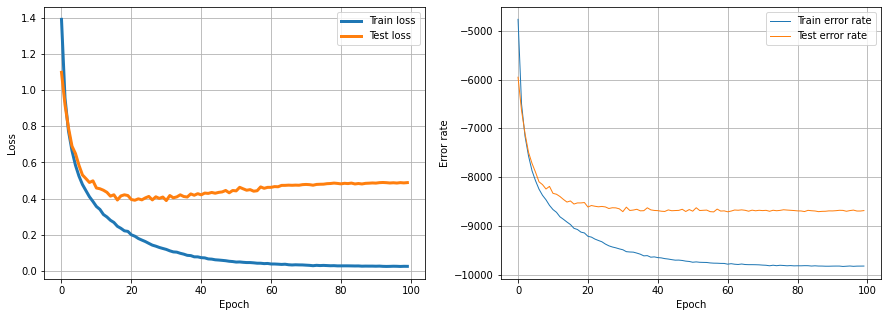

In [15]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.001,avg_pooling: 8, C_1: 32, epoch:100, decay: 0.9 every 2 epochs, log: 1158, batch: 128')
train_loss_hist = [1.3917777907208104, 0.956336284385008, 0.773902164700696, 0.6651700536918153, 0.5843847820063686, 0.5243884820462493, 0.4777846007091005, 0.4435749242982596, 0.40991232420324974, 0.38388081096932103, 0.35593334739775306, 0.33984669966770864, 0.31169083314326107, 0.2981199197223424, 0.2798978834582107, 0.26768173220212504, 0.24629800511366876, 0.23522717966829115, 0.22132633933249643, 0.218211253795325, 0.19922705168080757, 0.19155364603642613, 0.17885995090312665, 0.1702256477092538, 0.16196809048809663, 0.1518983533963218, 0.14212274551391602, 0.13641688019951895, 0.12926754179170064, 0.1236989385808063, 0.11840727296479218, 0.11069038971458249, 0.10476369865219612, 0.10331892975798958, 0.09697724723011789, 0.09224055468312005, 0.08570969671658847, 0.08418893357715033, 0.07741513774227685, 0.07726780981149363, 0.07279439028971793, 0.0716188851782047, 0.0659177142821843, 0.06471134868243238, 0.06104839940929352, 0.0596629205371832, 0.05783457391659546, 0.05586587570731521, 0.05285527844153478, 0.0512649594375011, 0.04844276376706941, 0.04910262584057458, 0.047124803690311245, 0.04575922267983103, 0.04574038194197104, 0.04420759288541725, 0.04211126513841093, 0.041980717154910495, 0.039894135591462064, 0.040721116965050666, 0.03776927095244798, 0.03770177783635076, 0.03668552611613898, 0.03540767178349102, 0.036489374162700705, 0.03364136076086889, 0.03240187728272565, 0.03345635083868452, 0.03273718579269736, 0.0325333973728692, 0.03132418057788402, 0.030246830677561214, 0.028290967764261432, 0.030380944782139166, 0.02909325873669799, 0.029965740752399272, 0.029088902794529716, 0.02811683018875244, 0.028592318425650524, 0.027340030676358953, 0.027420604477643662, 0.02758003846692193, 0.027531217298973017, 0.027210851307110408, 0.026807160936105433, 0.027025700927904957, 0.025658808240686042, 0.02612327291425365, 0.025955700703189158, 0.026016846024062092, 0.02547994666659009, 0.02606937606506945, 0.024788287062140757, 0.02429255830895756, 0.024696604881073583, 0.02538405746207251, 0.025044919795516277, 0.02420113534283112, 0.02498467503320378, 0.024751178593948826] 
train_acc_hist = "[tensor(48.6501, device='cuda:0'), tensor(66.0266, device='cuda:0'), tensor(72.6367, device='cuda:0'), tensor(76.6692, device='cuda:0'), tensor(79.7095, device='cuda:0'), tensor(81.7519, device='cuda:0'), tensor(83.4871, device='cuda:0'), tensor(84.7458, device='cuda:0'), tensor(85.6718, device='cuda:0'), tensor(86.8131, device='cuda:0'), tensor(87.6758, device='cuda:0'), tensor(88.2377, device='cuda:0'), tensor(89.1612, device='cuda:0'), tensor(89.6787, device='cuda:0'), tensor(90.2350, device='cuda:0'), tensor(90.7493, device='cuda:0'), tensor(91.5213, device='cuda:0'), tensor(91.7659, device='cuda:0'), tensor(92.3014, device='cuda:0'), tensor(92.4748, device='cuda:0'), tensor(93.1598, device='cuda:0'), tensor(93.3272, device='cuda:0'), tensor(93.7288, device='cuda:0'), tensor(94.0177, device='cuda:0'), tensor(94.2851, device='cuda:0'), tensor(94.7530, device='cuda:0'), tensor(95.1143, device='cuda:0'), tensor(95.3553, device='cuda:0'), tensor(95.5283, device='cuda:0'), tensor(95.7425, device='cuda:0'), tensor(95.9223, device='cuda:0'), tensor(96.3119, device='cuda:0'), tensor(96.3807, device='cuda:0'), tensor(96.4122, device='cuda:0'), tensor(96.6069, device='cuda:0'), tensor(96.8346, device='cuda:0'), tensor(97.1743, device='cuda:0'), tensor(97.1284, device='cuda:0'), tensor(97.4481, device='cuda:0'), tensor(97.3845, device='cuda:0'), tensor(97.5312, device='cuda:0'), tensor(97.5903, device='cuda:0'), tensor(97.7410, device='cuda:0'), tensor(97.8281, device='cuda:0'), tensor(97.9508, device='cuda:0'), tensor(98.0571, device='cuda:0'), tensor(98.0435, device='cuda:0'), tensor(98.1218, device='cuda:0'), tensor(98.2541, device='cuda:0'), tensor(98.3244, device='cuda:0'), tensor(98.4823, device='cuda:0'), tensor(98.4131, device='cuda:0'), tensor(98.4922, device='cuda:0'), tensor(98.5154, device='cuda:0'), tensor(98.5318, device='cuda:0'), tensor(98.6249, device='cuda:0'), tensor(98.6721, device='cuda:0'), tensor(98.6841, device='cuda:0'), tensor(98.7200, device='cuda:0'), tensor(98.7308, device='cuda:0'), tensor(98.8775, device='cuda:0'), tensor(98.7792, device='cuda:0'), tensor(98.8911, device='cuda:0'), tensor(98.9430, device='cuda:0'), tensor(98.8479, device='cuda:0'), tensor(98.9510, device='cuda:0'), tensor(98.9802, device='cuda:0'), tensor(98.9806, device='cuda:0'), tensor(98.9910, device='cuda:0'), tensor(99.0177, device='cuda:0'), tensor(99.0717, device='cuda:0'), tensor(99.1077, device='cuda:0'), tensor(99.2076, device='cuda:0'), tensor(99.0969, device='cuda:0'), tensor(99.1916, device='cuda:0'), tensor(99.1069, device='cuda:0'), tensor(99.1504, device='cuda:0'), tensor(99.2088, device='cuda:0'), tensor(99.1696, device='cuda:0'), tensor(99.2243, device='cuda:0'), tensor(99.2064, device='cuda:0'), tensor(99.2128, device='cuda:0'), tensor(99.1868, device='cuda:0'), tensor(99.1928, device='cuda:0'), tensor(99.2635, device='cuda:0'), tensor(99.2148, device='cuda:0'), tensor(99.2647, device='cuda:0'), tensor(99.2691, device='cuda:0'), tensor(99.2987, device='cuda:0'), tensor(99.2995, device='cuda:0'), tensor(99.2795, device='cuda:0'), tensor(99.2695, device='cuda:0'), tensor(99.2707, device='cuda:0'), tensor(99.3466, device='cuda:0'), tensor(99.3015, device='cuda:0'), tensor(99.2555, device='cuda:0'), tensor(99.3214, device='cuda:0'), tensor(99.2803, device='cuda:0'), tensor(99.2755, device='cuda:0'), tensor(99.2687, device='cuda:0')]"
test_loss_hist = [1.0984665147865875, 0.9204433213306379, 0.7914255555671982, 0.6901946939245055, 0.6490651263466364, 0.5842476264585422, 0.5305443043950238, 0.5102147301541099, 0.4889862073373191, 0.49808952061435846, 0.45829587024223956, 0.4542116847219346, 0.44603831066360955, 0.4345254775466798, 0.4133352931541733, 0.420821146119999, 0.39191911246957656, 0.4144272449650342, 0.42066419916816905, 0.4166829689771314, 0.39448749472068834, 0.3906719982624054, 0.3984605296503139, 0.39281789430334596, 0.40359761518768117, 0.41165512460696546, 0.3924434269908108, 0.40965906558912013, 0.4008377960211114, 0.4083712783795369, 0.3889063366606266, 0.41677385644067694, 0.4042286887953553, 0.4091539722454699, 0.4205703648585307, 0.4112275533283813, 0.40849455078191393, 0.4256009365184398, 0.41820130468923833, 0.4269372756722607, 0.4204979471013516, 0.4302572296767295, 0.428467526088787, 0.43372564923159684, 0.4294386219374741, 0.43418819391274754, 0.4367475324793707, 0.4447490638947185, 0.431868838358529, 0.44457442615228365, 0.4424000223980674, 0.4621554897933067, 0.4538731212857403, 0.4460753355222412, 0.44939189187333556, 0.4407021822054175, 0.44318879046772097, 0.46436736591254607, 0.4566610317818726, 0.46188675470744506, 0.4620657906502108, 0.4661111939179746, 0.4652701571017881, 0.472820773532119, 0.4729406354548056, 0.4741190030604978, 0.4733374897815004, 0.47427627085884916, 0.47368306600594823, 0.4769902227422859, 0.4780536989999723, 0.4769148760581318, 0.4737835943321638, 0.4781343912399268, 0.47908927009829994, 0.4794958744999729, 0.48228498199318026, 0.48323103917550436, 0.4855487550361247, 0.4837004930912694, 0.48125306394281264, 0.4843437869714785, 0.4828599695163437, 0.48557375654389584, 0.48070950032789495, 0.4832171859997737, 0.48071628431730634, 0.4841157065916665, 0.48499276234379296, 0.48631041148040866, 0.48536724738682374, 0.4879493636043766, 0.48889104097704345, 0.48783766035037707, 0.4861014773951301, 0.4873992146193227, 0.4857505829651145, 0.48814989928203295, 0.4866238047805014, 0.48823060000999063]
test_acc_hist = "[tensor(60.5222, device='cuda:0'), tensor(67.3457, device='cuda:0'), tensor(72.0827, device='cuda:0'), tensor(75.9296, device='cuda:0'), tensor(78.2041, device='cuda:0'), tensor(80.0040, device='cuda:0'), tensor(81.9818, device='cuda:0'), tensor(82.5554, device='cuda:0'), tensor(83.4553, device='cuda:0'), tensor(82.9213, device='cuda:0'), tensor(84.3453, device='cuda:0'), tensor(84.5332, device='cuda:0'), tensor(84.9980, device='cuda:0'), tensor(85.6013, device='cuda:0'), tensor(86.1353, device='cuda:0'), tensor(85.9078, device='cuda:0'), tensor(86.5407, device='cuda:0'), tensor(86.3133, device='cuda:0'), tensor(86.3133, device='cuda:0'), tensor(86.2342, device='cuda:0'), tensor(87.1539, device='cuda:0'), tensor(86.8473, device='cuda:0'), tensor(86.9957, device='cuda:0'), tensor(87.1044, device='cuda:0'), tensor(87.0352, device='cuda:0'), tensor(87.1341, device='cuda:0'), tensor(87.4604, device='cuda:0'), tensor(87.3022, device='cuda:0'), tensor(87.3319, device='cuda:0'), tensor(87.5297, device='cuda:0'), tensor(88.1032, device='cuda:0'), tensor(87.1835, device='cuda:0'), tensor(87.8659, device='cuda:0'), tensor(87.7769, device='cuda:0'), tensor(87.6187, device='cuda:0'), tensor(87.9351, device='cuda:0'), tensor(87.9055, device='cuda:0'), tensor(87.3121, device='cuda:0'), tensor(87.7373, device='cuda:0'), tensor(87.8560, device='cuda:0'), tensor(87.8956, device='cuda:0'), tensor(88.0142, device='cuda:0'), tensor(88.0637, device='cuda:0'), tensor(87.7472, device='cuda:0'), tensor(87.9154, device='cuda:0'), tensor(87.8758, device='cuda:0'), tensor(87.8461, device='cuda:0'), tensor(87.6187, device='cuda:0'), tensor(88.0736, device='cuda:0'), tensor(87.6780, device='cuda:0'), tensor(88.0044, device='cuda:0'), tensor(87.3022, device='cuda:0'), tensor(87.8758, device='cuda:0'), tensor(87.8263, device='cuda:0'), tensor(87.7868, device='cuda:0'), tensor(88.1032, device='cuda:0'), tensor(88.1527, device='cuda:0'), tensor(87.5791, device='cuda:0'), tensor(87.9846, device='cuda:0'), tensor(87.9450, device='cuda:0'), tensor(88.1329, device='cuda:0'), tensor(87.9846, device='cuda:0'), tensor(87.7670, device='cuda:0'), tensor(87.8165, device='cuda:0'), tensor(87.7373, device='cuda:0'), tensor(87.8263, device='cuda:0'), tensor(88.0142, device='cuda:0'), tensor(87.7967, device='cuda:0'), tensor(87.9252, device='cuda:0'), tensor(87.8263, device='cuda:0'), tensor(87.8857, device='cuda:0'), tensor(87.8362, device='cuda:0'), tensor(88.0241, device='cuda:0'), tensor(87.8165, device='cuda:0'), tensor(87.9154, device='cuda:0'), tensor(87.8461, device='cuda:0'), tensor(87.7176, device='cuda:0'), tensor(87.7769, device='cuda:0'), tensor(87.8263, device='cuda:0'), tensor(87.8758, device='cuda:0'), tensor(87.9450, device='cuda:0'), tensor(87.9648, device='cuda:0'), tensor(88.0835, device='cuda:0'), tensor(87.8362, device='cuda:0'), tensor(87.9154, device='cuda:0'), tensor(87.9648, device='cuda:0'), tensor(88.1032, device='cuda:0'), tensor(88.0439, device='cuda:0'), tensor(88.0241, device='cuda:0'), tensor(87.9450, device='cuda:0'), tensor(87.9549, device='cuda:0'), tensor(87.9055, device='cuda:0'), tensor(87.8263, device='cuda:0'), tensor(87.8461, device='cuda:0'), tensor(88.0241, device='cuda:0'), tensor(87.8857, device='cuda:0'), tensor(87.7868, device='cuda:0'), tensor(87.9747, device='cuda:0'), tensor(87.9747, device='cuda:0'), tensor(87.8857, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')

lr: 0.1,avg_pooling: 8, C_1: 80, epoch:100, decay: 1/4 every 20 epochs and 0.0001, log: 2673, batch: 128
train_loss_hist:  [1.6870923170348262, 1.1839184915013325, 0.9354025817588162, 0.7954646819997626, 0.6556480390488949, 0.5630381869538056, 0.4969766168185817, 0.4430860078243343, 0.3978773778890405, 0.3609595347167281, 0.3284912687509566, 0.3032292761766087, 0.2746172470547964, 0.2546869405852559, 0.23343201943904238, 0.216896293146531, 0.20020788614554783, 0.18613718582503022, 0.17252734079575904, 0.16042190816853663, 0.09342816765979885, 0.06815307563566186, 0.059728099854991716, 0.0536940234863316, 0.04795629771478722, 0.04241818447699747, 0.037419669052628834, 0.03461564118590425, 0.03251406275774436, 0.02971604550995714, 0.028467246274108928, 0.025449724318316717, 0.023855353266124608, 0.021183171924656196, 0.021398829503754234, 0.020028359907538727, 0.017336404964844683, 0.01746991868523876, 0.016127337374554143, 0.015626124146839847, 0.012009913643972133, 0.009676286125528243

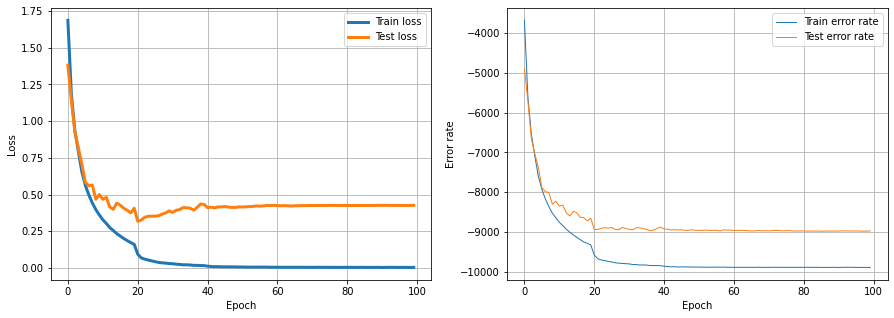

In [16]:
import matplotlib.pyplot as plt
import torch
import torchvision
print('lr: 0.1,avg_pooling: 8, C_1: 80, epoch:100, decay: 1/4 every 20 epochs and 0.0001, log: 2673, batch: 128')
train_loss_hist = [1.6870923170348262, 1.1839184915013325, 0.9354025817588162, 0.7954646819997626, 0.6556480390488949, 0.5630381869538056, 0.4969766168185817, 0.4430860078243343, 0.3978773778890405, 0.3609595347167281, 0.3284912687509566, 0.3032292761766087, 0.2746172470547964, 0.2546869405852559, 0.23343201943904238, 0.216896293146531, 0.20020788614554783, 0.18613718582503022, 0.17252734079575904, 0.16042190816853663, 0.09342816765979885, 0.06815307563566186, 0.059728099854991716, 0.0536940234863316, 0.04795629771478722, 0.04241818447699747, 0.037419669052628834, 0.03461564118590425, 0.03251406275774436, 0.02971604550995714, 0.028467246274108928, 0.025449724318316717, 0.023855353266124608, 0.021183171924656196, 0.021398829503754234, 0.020028359907538727, 0.017336404964844683, 0.01746991868523876, 0.016127337374554143, 0.015626124146839847, 0.012009913643972133, 0.009676286125528243, 0.008244277235022877, 0.008894341897613624, 0.007307419849498926, 0.007484704157357793, 0.007302592157164727, 0.0069242566398194875, 0.007219712174309375, 0.006186121848293954, 0.006499912226251076, 0.0055775615920210285, 0.005608227863030084, 0.00544955318271423, 0.005742208937497433, 0.005471520727481562, 0.005351310225633566, 0.005338183417201728, 0.004707773849430621, 0.004787638238223289, 0.004511723508183008, 0.0045329414604617585, 0.004286633909988406, 0.004402493910484083, 0.004466180833588924, 0.004277243368688476, 0.0043062064565567515, 0.004578444210852942, 0.003984393872385559, 0.0041076400097074875, 0.003864660600150871, 0.004479831488899198, 0.0044271824565088455, 0.004208255121085431, 0.0040926217561369745, 0.003927208321324437, 0.004021676214899549, 0.003788174271001183, 0.004021741220128515, 0.0037501097920730644, 0.0038663045516746154, 0.004018500118720038, 0.0036549360798451514, 0.003533024703139973, 0.004123557022536921, 0.0037233230755086798, 0.0035741319689337556, 0.0037259493875281546, 0.003648668347099853, 0.0040158169687805395, 0.00322325119395595, 0.0035996674932926524, 0.004025815824351018, 0.003937061731618724, 0.0037217990708444506, 0.003422577037711811, 0.003893163162664703, 0.0036253384429850684, 0.0033872630499997666, 0.003450623806178941] 
train_acc_hist = "[tensor(37.7146, device='cuda:0'), tensor(57.0380, device='cuda:0'), tensor(66.4906, device='cuda:0'), tensor(72.0189, device='cuda:0'), tensor(77.0309, device='cuda:0'), tensor(80.3005, device='cuda:0'), tensor(82.7262, device='cuda:0'), tensor(84.6148, device='cuda:0'), tensor(86.3055, device='cuda:0'), tensor(87.4433, device='cuda:0'), tensor(88.5961, device='cuda:0'), tensor(89.4289, device='cuda:0'), tensor(90.3385, device='cuda:0'), tensor(91.0934, device='cuda:0'), tensor(91.7491, device='cuda:0'), tensor(92.3793, device='cuda:0'), tensor(92.9711, device='cuda:0'), tensor(93.5542, device='cuda:0'), tensor(93.8819, device='cuda:0'), tensor(94.3055, device='cuda:0'), tensor(96.8474, device='cuda:0'), tensor(97.7857, device='cuda:0'), tensor(98.0599, device='cuda:0'), tensor(98.2593, device='cuda:0'), tensor(98.4259, device='cuda:0'), tensor(98.5989, device='cuda:0'), tensor(98.7788, device='cuda:0'), tensor(98.8907, device='cuda:0'), tensor(98.9458, device='cuda:0'), tensor(99.0098, device='cuda:0'), tensor(99.0757, device='cuda:0'), tensor(99.2267, device='cuda:0'), tensor(99.2327, device='cuda:0'), tensor(99.3474, device='cuda:0'), tensor(99.3306, device='cuda:0'), tensor(99.3614, device='cuda:0'), tensor(99.4913, device='cuda:0'), tensor(99.4733, device='cuda:0'), tensor(99.4981, device='cuda:0'), tensor(99.5185, device='cuda:0'), tensor(99.6483, device='cuda:0'), tensor(99.7363, device='cuda:0'), tensor(99.8002, device='cuda:0'), tensor(99.7822, device='cuda:0'), tensor(99.8501, device='cuda:0'), tensor(99.8122, device='cuda:0'), tensor(99.8302, device='cuda:0'), tensor(99.8609, device='cuda:0'), tensor(99.8410, device='cuda:0'), tensor(99.8801, device='cuda:0'), tensor(99.8581, device='cuda:0'), tensor(99.9081, device='cuda:0'), tensor(99.8869, device='cuda:0'), tensor(99.9021, device='cuda:0'), tensor(99.8861, device='cuda:0'), tensor(99.8761, device='cuda:0'), tensor(99.8961, device='cuda:0'), tensor(99.8621, device='cuda:0'), tensor(99.9169, device='cuda:0'), tensor(99.9221, device='cuda:0'), tensor(99.9161, device='cuda:0'), tensor(99.9201, device='cuda:0'), tensor(99.9341, device='cuda:0'), tensor(99.9321, device='cuda:0'), tensor(99.9141, device='cuda:0'), tensor(99.9361, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9001, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9361, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9221, device='cuda:0'), tensor(99.9221, device='cuda:0'), tensor(99.9201, device='cuda:0'), tensor(99.9309, device='cuda:0'), tensor(99.9401, device='cuda:0'), tensor(99.9301, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9201, device='cuda:0'), tensor(99.9401, device='cuda:0'), tensor(99.9301, device='cuda:0'), tensor(99.9181, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9381, device='cuda:0'), tensor(99.9361, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9520, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9461, device='cuda:0'), tensor(99.9281, device='cuda:0'), tensor(99.9600, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9117, device='cuda:0'), tensor(99.9161, device='cuda:0'), tensor(99.9321, device='cuda:0'), tensor(99.9540, device='cuda:0'), tensor(99.9421, device='cuda:0'), tensor(99.9540, device='cuda:0'), tensor(99.9560, device='cuda:0'), tensor(99.9560, device='cuda:0')]"
test_loss_hist = [1.381694672982904, 1.1433245517030548, 0.9294102048572106, 0.8172899778885178, 0.7066864303395718, 0.582366130020045, 0.5604647171648243, 0.5648449995095217, 0.46765834979618653, 0.4998038226290594, 0.4677735054040257, 0.4805273770154277, 0.4148069433396376, 0.3994281061842472, 0.4412124743567237, 0.4276722801637046, 0.4067089621779285, 0.3926439969977246, 0.3756386909303786, 0.40643271294575706, 0.31846855316735523, 0.32589743993704834, 0.34533762903530385, 0.3514516468666777, 0.3530045104554937, 0.352631802517402, 0.3555513825974887, 0.3666583141194114, 0.3751216472326955, 0.3883569032142434, 0.3786147208530692, 0.3926077532240107, 0.397477480901193, 0.41097318767746793, 0.40990074771114543, 0.40712170887597, 0.3937226401854165, 0.41203486495002917, 0.43547615616381924, 0.4322231749567804, 0.4109078388236746, 0.4141301329754576, 0.4096702084511141, 0.41561078770628457, 0.4160349523719353, 0.41811061801412436, 0.41448189120126677, 0.4122804071329817, 0.4125197562801687, 0.41614575014461447, 0.4150627766606174, 0.4163467971773087, 0.418189265399794, 0.419186076974567, 0.4224366835212406, 0.42055090865756894, 0.42273918850512443, 0.4257718838657005, 0.42488070379329634, 0.42649545407370676, 0.42439826568470723, 0.4236212175669549, 0.4240475697796556, 0.4231839110202427, 0.4217980964274346, 0.42334259131663965, 0.423658606938169, 0.42487896941130676, 0.4246085938773578, 0.4252626806308952, 0.4250258308234094, 0.42526952837464177, 0.4255735028205039, 0.42582733863139455, 0.42561649295348153, 0.4262903475120098, 0.4260820941645888, 0.42613920380797565, 0.4254356827351111, 0.4258915333996845, 0.4257553753596318, 0.4251617036665542, 0.42550596330739276, 0.425272191532805, 0.4254356407666508, 0.425383980515637, 0.42575805332464506, 0.42564434463842005, 0.4257943438766878, 0.42646950634219977, 0.4265389876275123, 0.4264639583946783, 0.4260808382230469, 0.4259203230089779, 0.4260532442904726, 0.4257080296549616, 0.4256668451088893, 0.4258564746455301, 0.42588508449777773, 0.4262922464669505]
test_acc_hist = "[tensor(49.7923, device='cuda:0'), tensor(58.1191, device='cuda:0'), tensor(67.5831, device='cuda:0'), tensor(71.3904, device='cuda:0'), tensor(74.7923, device='cuda:0'), tensor(79.8457, device='cuda:0'), tensor(80.8742, device='cuda:0'), tensor(81.1017, device='cuda:0'), tensor(84.0289, device='cuda:0'), tensor(83.2872, device='cuda:0'), tensor(84.4937, device='cuda:0'), tensor(84.2860, device='cuda:0'), tensor(86.2144, device='cuda:0'), tensor(87.0154, device='cuda:0'), tensor(85.8188, device='cuda:0'), tensor(86.1946, device='cuda:0'), tensor(87.3418, device='cuda:0'), tensor(87.4011, device='cuda:0'), tensor(88.2318, device='cuda:0'), tensor(87.5593, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.3877, device='cuda:0'), tensor(90.0712, device='cuda:0'), tensor(89.9624, device='cuda:0'), tensor(90.0514, device='cuda:0'), tensor(89.8932, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(89.8932, device='cuda:0'), tensor(90.1404, device='cuda:0'), tensor(90.3679, device='cuda:0'), tensor(90.4865, device='cuda:0'), tensor(89.9624, device='cuda:0'), tensor(89.9723, device='cuda:0'), tensor(90.1998, device='cuda:0'), tensor(90.3778, device='cuda:0'), tensor(90.6942, device='cuda:0'), tensor(90.5459, device='cuda:0'), tensor(90.1009, device='cuda:0'), tensor(89.8240, device='cuda:0'), tensor(90.2591, device='cuda:0'), tensor(90.3481, device='cuda:0'), tensor(90.5261, device='cuda:0'), tensor(90.4371, device='cuda:0'), tensor(90.5360, device='cuda:0'), tensor(90.4470, device='cuda:0'), tensor(90.6349, device='cuda:0'), tensor(90.5558, device='cuda:0'), tensor(90.4964, device='cuda:0'), tensor(90.6052, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(90.6052, device='cuda:0'), tensor(90.5657, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(90.5953, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.4865, device='cuda:0'), tensor(90.5657, device='cuda:0'), tensor(90.5360, device='cuda:0'), tensor(90.6646, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(90.6250, device='cuda:0'), tensor(90.6448, device='cuda:0'), tensor(90.7041, device='cuda:0'), tensor(90.7437, device='cuda:0'), tensor(90.7536, device='cuda:0'), tensor(90.6547, device='cuda:0'), tensor(90.7239, device='cuda:0'), tensor(90.7140, device='cuda:0'), tensor(90.7536, device='cuda:0'), tensor(90.6646, device='cuda:0'), tensor(90.6448, device='cuda:0'), tensor(90.6646, device='cuda:0'), tensor(90.7635, device='cuda:0'), tensor(90.6744, device='cuda:0'), tensor(90.6942, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.7635, device='cuda:0'), tensor(90.7536, device='cuda:0'), tensor(90.8129, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.8030, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.8327, device='cuda:0'), tensor(90.8030, device='cuda:0'), tensor(90.8030, device='cuda:0'), tensor(90.7832, device='cuda:0'), tensor(90.7832, device='cuda:0'), tensor(90.8030, device='cuda:0'), tensor(90.7437, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.7635, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.7733, device='cuda:0'), tensor(90.8228, device='cuda:0'), tensor(90.7931, device='cuda:0'), tensor(90.7733, device='cuda:0')]"
train_accuracy_hist = []
test_accuracy_hist = []
for i in range(len(train_acc_hist)):
  if train_acc_hist[i] == 't':
    temp = train_acc_hist[i+7:i+13]
    train_accuracy_hist.append(float(temp))
for i in range(len(test_acc_hist)):
  if test_acc_hist[i] == 't':
    temp = test_acc_hist[i+7:i+13]
    test_accuracy_hist.append(float(temp))
print('train_loss_hist: ', train_loss_hist)
print('train_accuracy_hist: ', train_accuracy_hist)
print('test_loss_hist: ', test_loss_hist)
print('test_accuracy_hist: ', test_accuracy_hist)
num_epochs = 100
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_hist,'-',linewidth=3,label='Train loss')
plt.plot(range(num_epochs),test_loss_hist,'-',linewidth=3,label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

test_err_history = []
train_err_history = []
for i in range(num_epochs):
    test_err_history.append(100 - test_accuracy_hist[i]*100)
    train_err_history.append(100 - train_accuracy_hist[i]*100)

plt.subplot(1,2,2)
# plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),train_err_history[:num_epochs],'-',linewidth=1,label='Train error rate')
plt.plot(range(num_epochs),test_err_history[:num_epochs],'-',linewidth=1,label='Test error rate')

# plt.ylim(0,20)
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.grid(True)
plt.legend()
print('Average testing accuracy is among 100 epochs ' + str(sum(test_accuracy_hist)/len(test_accuracy_hist)) + '%')
print('Maximum testing accuracy is ' + str(max(test_accuracy_hist)) + '%')